<a href="https://colab.research.google.com/github/draglar/team2_dcs6_loan_prediction/blob/main/Loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color=”green”> Importing libraries </font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## <font color=”green”> Loading dataset </font>

In [ ]:
test= pd.read_csv('/content/test_dataset.csv')
loans= pd.read_csv('/content/train_dataset.csv')

## <font color=”green”>Exploring our Dataset  </font>

In [ ]:
loans.head()

Loan_ID Loan_Amount_Requested  ... Total_Accounts Gender
0  10164310                27,500  ...             37   Male
1  10164311                26,000  ...             23   Male
2  10164312                 6,075  ...             20   Male
3  10164313                12,000  ...              8   Male
4  10164314                35,000  ...             21   Male

[5 rows x 13 columns]

In [ ]:
loans.tail()

Loan_ID Loan_Amount_Requested  ...  Gender Interest_Rate
164304  10164305                20,725  ...    Male             2
164305  10164306                 6,000  ...    Male             2
164306  10164307                20,250  ...    Male             1
164307  10164308                10,000  ...  Female             3
164308  10164309                 9,250  ...  Female             2

[5 rows x 14 columns]

In [ ]:
loans.shape

(164309, 14)

> * Our dataset has 164309 rows and 14 columns.
> * our dataset comprises of loan_ids that represent individuals that have requested loans from bank and the different factors theat the banks consinder for them to givethe loan
>* some of the columns suchs as annual income,months since deliquency have null values
> * Loan_id is our primary ke with loan requsted being our dependent variables 
>* We have many columns that try and explain individuals who are taking the loans

In [ ]:
loans.duplicated().sum()

0

> no duplicate values

In [ ]:
loans.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

> There is a lot of null values in the dataset but can only be imputated

> * Length employed <- Some borrowers may have not been previously employed, thats why there are null values
> * Home owner <- Others can be living with family and friends.
> * Annual Income <- Some borrowers may have not been previously employed or some may not have a ligitimate source of income or 😅 they are politicians ... etc
>*  Months since deliquency <-  In a financial sense, delinquency occurs as soon as a borrower misses a payment on a loan. In contrast, default occurs when a borrower fails to repay the loan as specified in the original contract

In [ ]:
loans.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

> Our datatypes is comprised of both intergers and strings

## <font color=”green”>Cleaning our Dataset  </font>

**Loan amount requested**

In [ ]:
loans['Loan_Amount_Requested'] = loans['Loan_Amount_Requested'].str.replace(',', '')
loans['Loan_Amount_Requested'] = loans['Loan_Amount_Requested'].astype('int')

> Loan_Amount_Requested had commas and had to be replaced and its  datatype changed to interger

**Length employed**

In [ ]:
le = loans['Length_Employed']

In [ ]:
le.unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [ ]:
le[le=='< 1 year'] = '0 years'
le.fillna('0 years', inplace=True)

> We combined those who did not give their time employed and those who had 0 to 1 year of employment time

In [ ]:
lef = le.str.replace('years','').str.replace('year','').str.replace('<','').str.replace('+','').str.replace(' ','')

In [ ]:
loans['Length_Employed']=lef.astype('int')

> We then removed the strings in the column leaving only the integers

> As we can see most employees in our database have worked over 10 years and above with the least being 9 years.

In [ ]:
loans['Length_Employed'].isna().sum()

0

In [ ]:
loans['Length_Employed'].value_counts()

10    52915
0     20176
2     14620
3     12974
5     10814
1     10422
4      9784
7      9308
6      9094
8      7917
9      6285
Name: Length_Employed, dtype: int64

**Home owner**

In [ ]:
own = loans['Home_Owner']
own.value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

> Most clients have mortagage schemes 

In [ ]:
loans['Home_Owner'].isna().sum()

25349

> We can consider these methods to fill the missing values:

* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

In [ ]:
loans['Home_Owner']=own.fillna('Other')

In [ ]:
loans['Home_Owner'].isna().sum()

0

**Annual_Income**

In [ ]:
print(loans['Annual_Income'].isna().sum())

25102


In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  int64  
 2   Length_Employed          164309 non-null  int64  
 3   Home_Owner               164309 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [ ]:
# mean, mode and median Annual income

print('Mean Annual income is ' + str(loans.Annual_Income.mean()))
print('Median Annual income is ' + str(loans.Annual_Income.median()))
print('Mode Annual income is ' + str(loans.Annual_Income.mode()))

Mean Annual income is 73331.15943386468
Median Annual income is 63000.0
Mode Annual income is 0    60000.0
dtype: float64


In [ ]:
loans['Annual_Income'] = loans.groupby(['Purpose_Of_Loan','Gender','Debt_To_Income'], sort=False)['Annual_Income'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
import tqdm
def fix(dfr):
  na=dfr['Annual_Income'][dfr['Annual_Income'].isna()==True].index
  # df=pd.concat([train,test])
  for ind in tqdm.tqdm(na):
    # ind=dfr['Age'].index
    purpose     =dfr['Purpose_Of_Loan'].iloc[ind]
    gender      =dfr['Gender'].iloc[ind]
    debt_income =dfr['Debt_To_Income'].iloc[ind]
    mn=(dfr['Annual_Income'][(dfr['Purpose_Of_Loan']==purpose) & 
                             (dfr['Gender']==gender) &
                             ((dfr['Debt_To_Income'] <= (debt_income+1))& 
                              (dfr['Debt_To_Income'] >= (debt_income-1))
                              )]).mean()
    # print(mn)
    dfr['Annual_Income'].iloc[ind]= mn
    pass
fix(loans)

0it [00:00, ?it/s]


In [ ]:
print(loans['Annual_Income'].value_counts())

60000.00     5575
50000.00     4873
65000.00     4082
40000.00     3906
70000.00     3738
             ... 
38124.00        1
38676.00        1
79310.00        1
181596.00       1
92188.45        1
Name: Annual_Income, Length: 18831, dtype: int64


> we can observe that our column annual income has 5462 individiduals out of 164309

In [ ]:
print(loans['Annual_Income'].mean())
print(loans['Annual_Income'].median())
print(loans['Annual_Income'].mode())

73294.60892535724
65000.0
0    60000.0
dtype: float64


> We can consider these methods to fill the missing values:

* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

> we used library tqdm to help us in knowing how much time the iteration will take.
> We decided of imputating around the various categories we had that did not have any missing values and whose combination of descriptive stastistics(mean,mode,median) were not too far from the intial ones.

In [ ]:
loans['Annual_Income'].isna().sum()

2492

**Deliquency**

In [ ]:
loans['Months_Since_Deliquency'].isna().sum()

88379

>total null values  of months  in deliquency are 88379 .We crete levels of labels to get rid of them since dropping them is unnecessary.

>The missing values were assumed to be the clients that dont default

In [ ]:
# Creating the classifications of the customers from 
def status(x):
  if x<=3.0:
    return 'Low risk'
  elif ((x>3.0) & (x<=12.0)):
    return 'Medium risk'
  elif x>12.0:
    return 'High risk'
  else:
    return 'Normal'

In [ ]:
loans['deliquency_level']=loans.apply(lambda x: status(x['Months_Since_Deliquency']),axis=1)

In [ ]:
loans.drop('Months_Since_Deliquency',axis=1,inplace=True)


In [ ]:
loans['deliquency_level'].value_counts()

Normal         88379
High risk      61548
Medium risk    12210
Low risk        2172
Name: deliquency_level, dtype: int64

In [ ]:
loans.dropna(inplace=True)

In [ ]:
loans.isna().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
deliquency_level         0
dtype: int64

In [ ]:
loans.shape

(161817, 14)

#### Checking  and dealing with Outliers

In [ ]:
sns.set(rc={'figure.figsize':(18,6)},style="white")

In [ ]:
loans.dtypes

Loan_ID                    int64
Loan_Amount_Requested      int64
Length_Employed            int64
Home_Owner                object
Annual_Income            float64
Income_Verified           object
Purpose_Of_Loan           object
Debt_To_Income           float64
Inquiries_Last_6Mo         int64
Number_Open_Accounts       int64
Total_Accounts             int64
Gender                    object
Interest_Rate              int64
deliquency_level          object
dtype: object

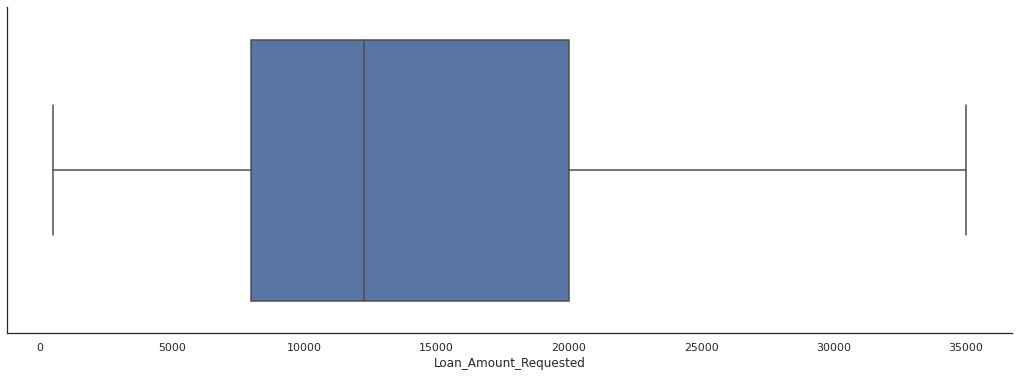

In [ ]:
sns.boxplot(x=loans['Loan_Amount_Requested'])
sns.despine()

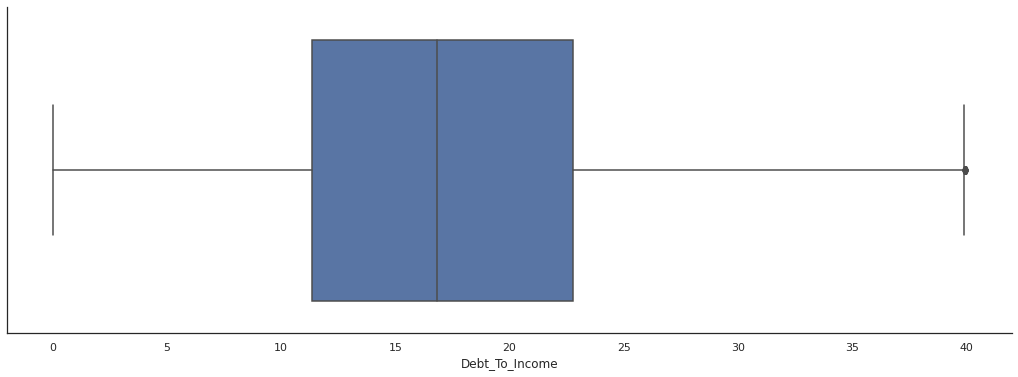

In [ ]:
sns.boxplot(x=loans['Debt_To_Income'])
sns.despine()

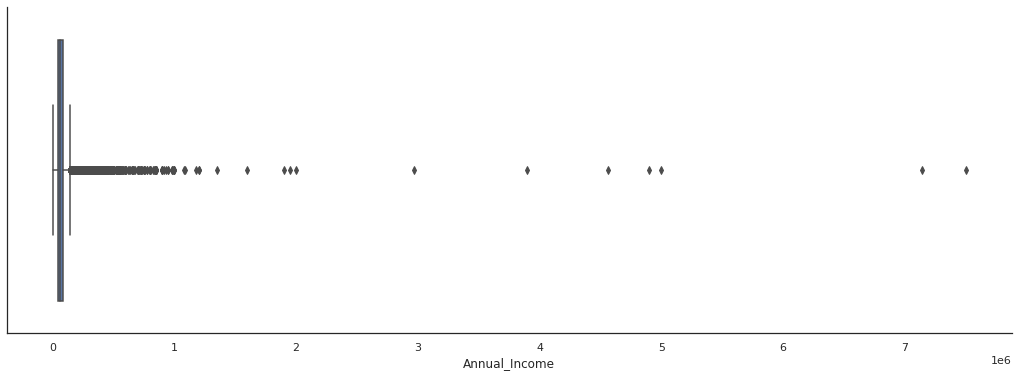

In [ ]:
sns.boxplot(x=loans['Annual_Income'])
sns.despine()

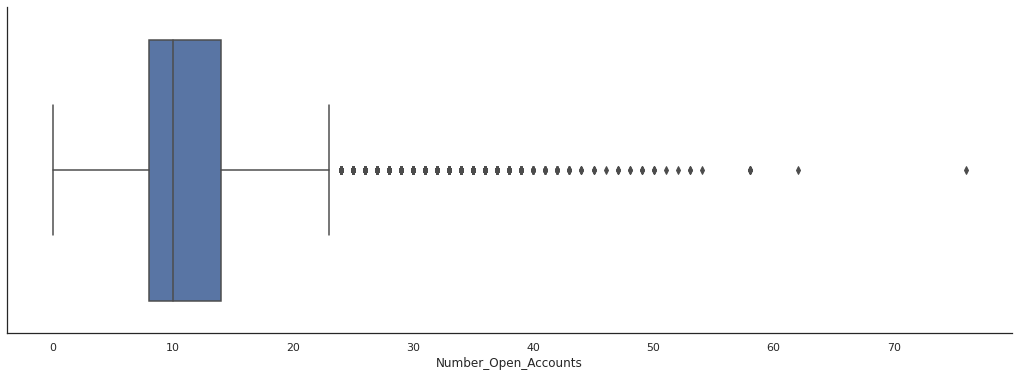

In [ ]:
sns.boxplot(x=loans['Number_Open_Accounts'])
sns.despine()

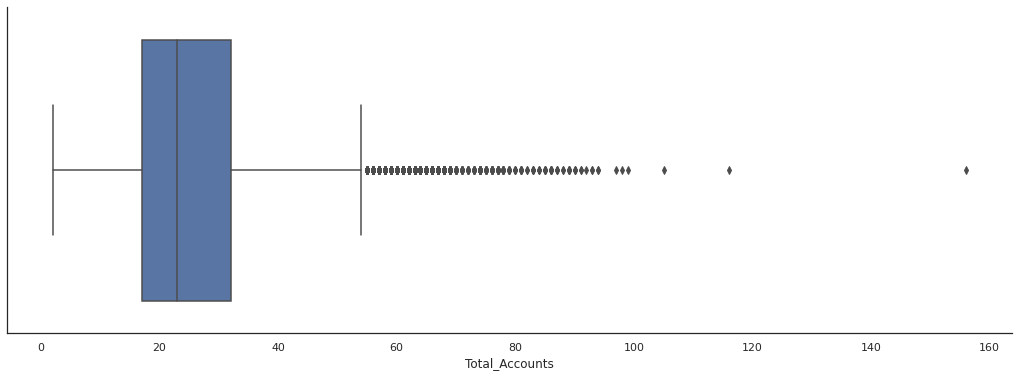

In [ ]:
sns.boxplot(x=loans['Total_Accounts'])
sns.despine()

>* In our interger columns we have outliers in all columns apart from loan amount requested and debt to income ratio.

>* It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

>* Unfortunately our dataset is made up people's income levels which is fixed and we cannot change.


## <font color=”green”>Exploratory Analysis </font>

##### <font color="yellow">Univariate Analysis  </font>

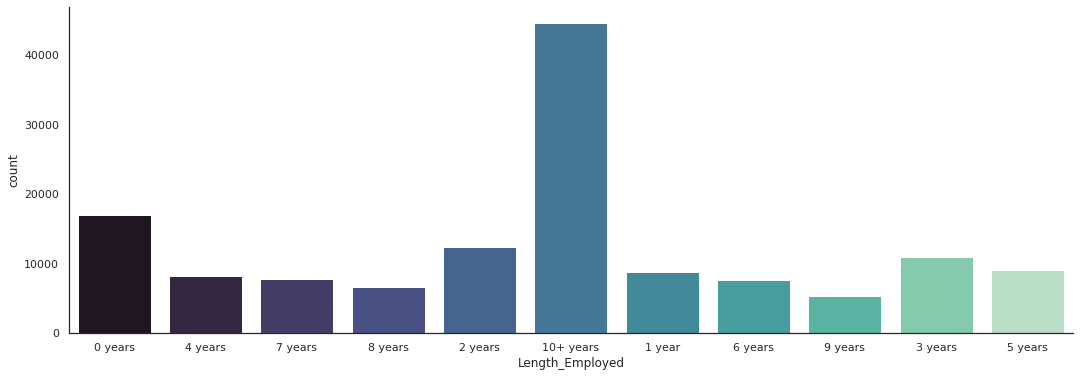

In [ ]:
sns.countplot(x='Length_Employed',data=loans,palette='mako')
sns.despine()

* 10+ years were the highest to request for a loan

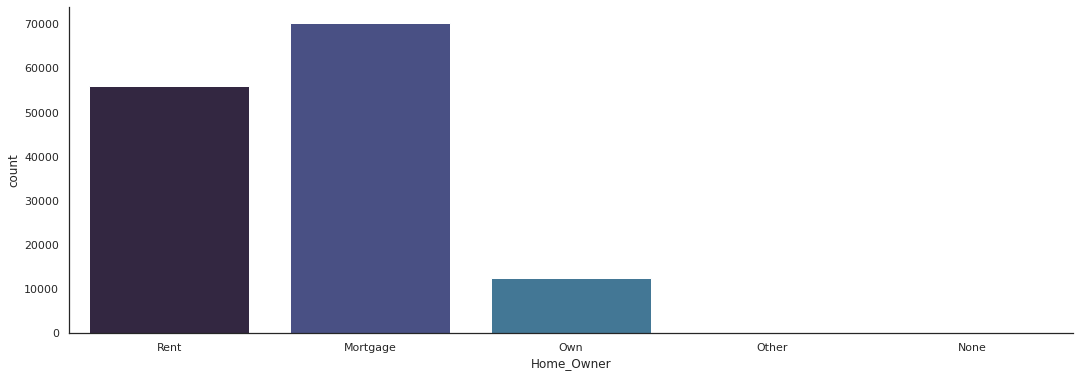

In [ ]:
# Plotting bar chart to show home ownership
sns.countplot(x='Home_Owner',data=loans,palette='mako')
sns.despine()

* The Mortgage home owners are the highest and owned home_owners lowest

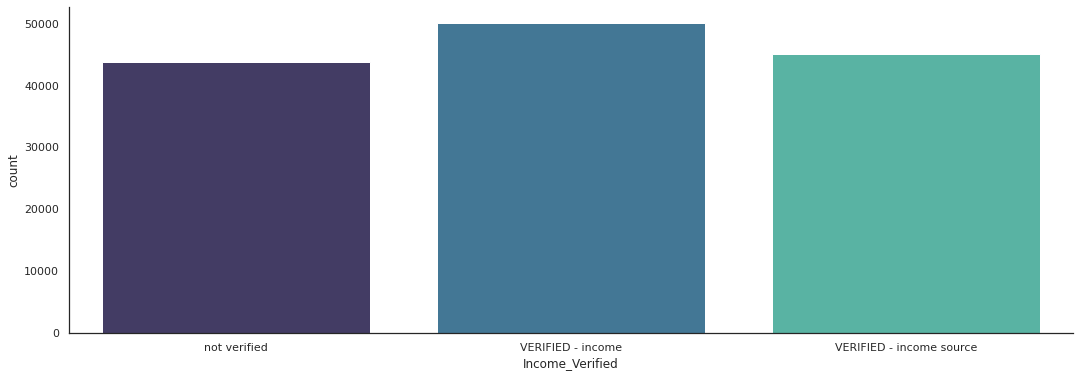

In [ ]:
# Plotting bar chart to show income verified 
sns.countplot(x='Income_Verified',data=loans,palette='mako')
sns.despine()

 On verified income individuals the ones who have Verified income have the highest count and not verified lowest count.

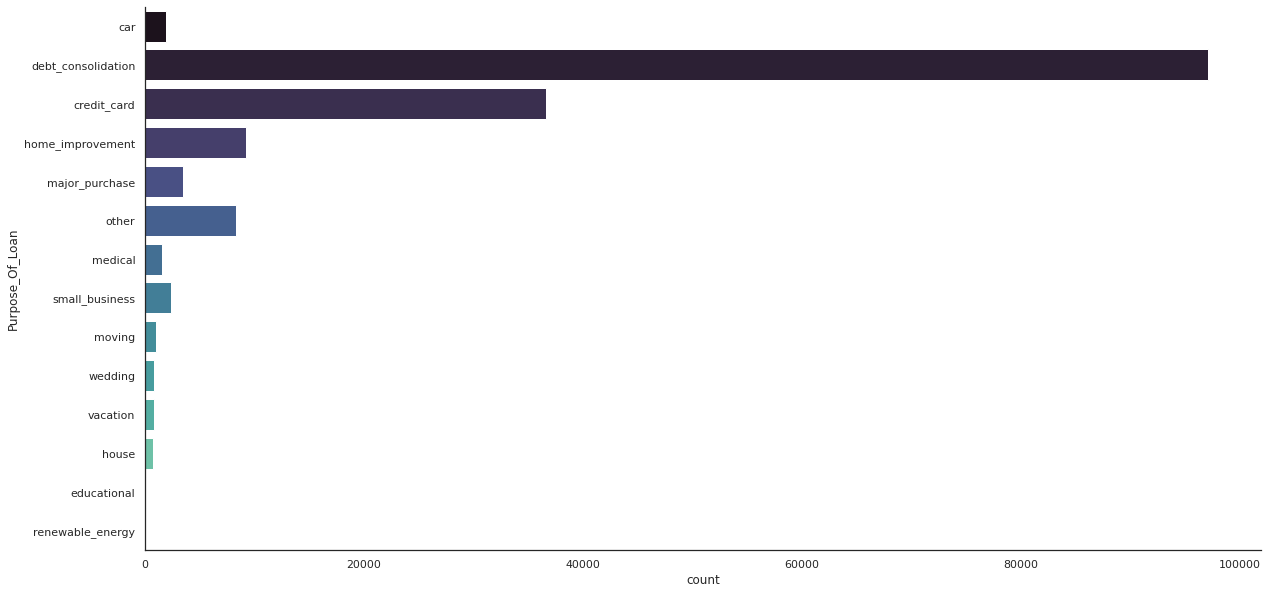

In [ ]:
# Plotting bar chart to show purpose of loan 
sns.set(rc={'figure.figsize':(20,10)},style="white")
sns.countplot(y='Purpose_Of_Loan',data=loans,palette='mako')
sns.despine()

> From the value counts the most loans were debt consolidation which means paying off loans in other banks followed by credit cards.

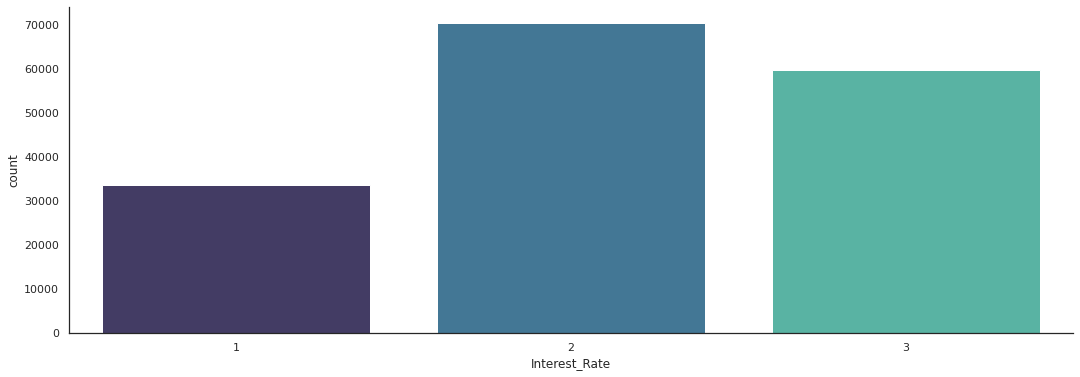

In [ ]:
# Plotting bar chart to show inquiries in last 6 months. 
sns.countplot(x='Interest_Rate',data=loans,palette='mako')
sns.despine()

> We observe that interest rate category 2 is the highest followed by  category 3.

>We can  also observe that there is an imbalance in interest rate which is our Target variable which  can cause bias in modelling process.This imbalance has to be checked later.


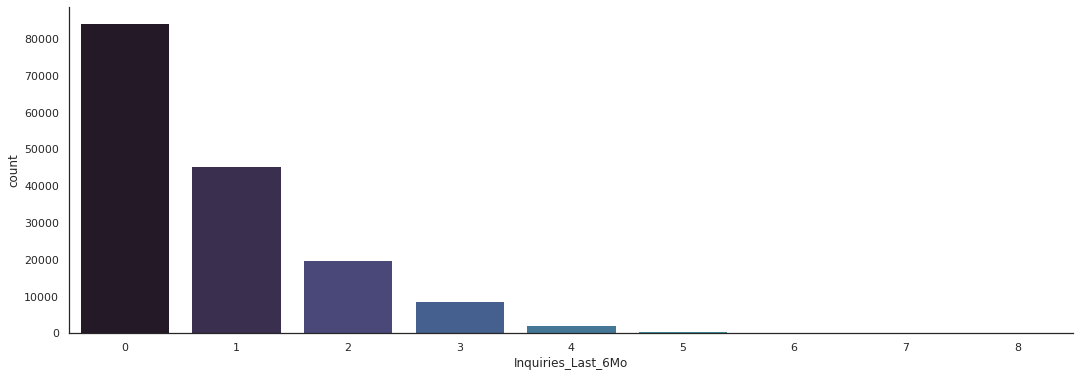

In [ ]:
# Plotting bar chart to show inquiries in last 6 months. 
sns.countplot(x='Inquiries_Last_6Mo',data=loans,palette='mako')
sns.despine()

Most of the enquiries are done during the initial months, decreasing towards the sixth month.

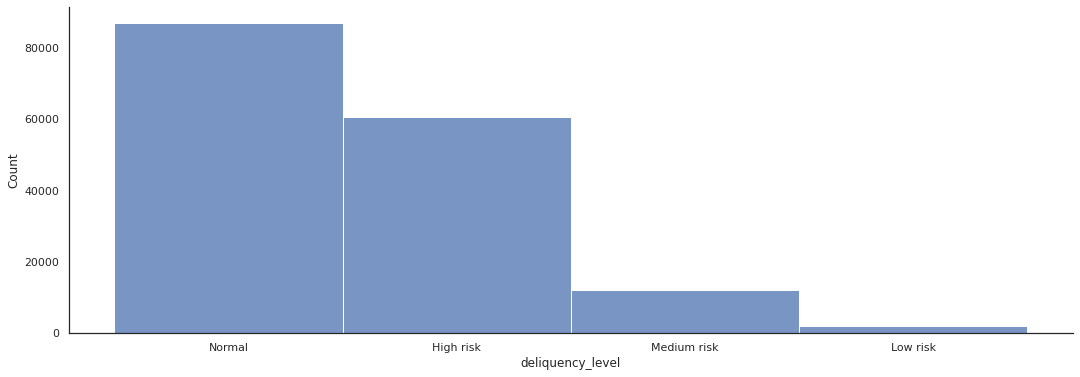

In [ ]:
sns.histplot(x='deliquency_level',data=loans,palette='mako')
sns.despine()

> **description deliquency**<- In a financial sense, delinquency occurs as soon as a borrower misses a payment on a loan. In contrast, default occurs when a borrower fails to repay the loan as specified in the original contractMost are low risk clients are highest and normal client who do not default are lowest

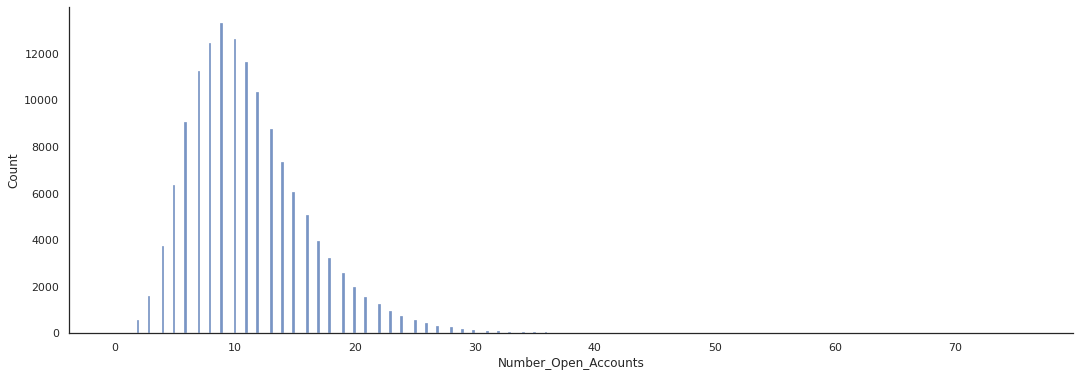

In [ ]:
sns.histplot(x='Number_Open_Accounts',data=loans,palette='mako')
sns.despine()

> Most clients have more than one accounts opened as we can see above its right-skewed.With most having more than 10.

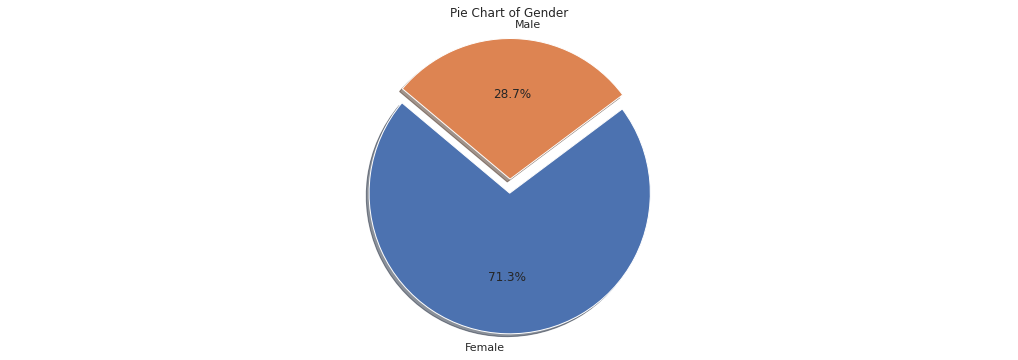

In [ ]:
#Gender Distribution
Gender = loans['Gender'].value_counts()
labels = loans.Gender.unique()
explode = (0.1, 0) 
plt.pie(Gender, labels = labels, explode = explode,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Gender')
plt.show()

> Males have the highest percentage in loan applications with a 71 percent higher than females with percentage of 29 percent.

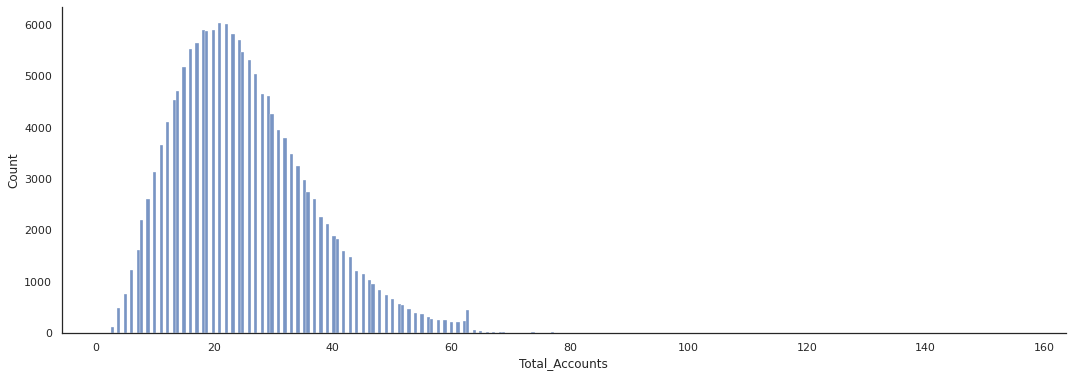

In [ ]:
# Plotting histogram for Total Accounts 
sns.histplot(loans['Total_Accounts'])
sns.despine()

> most clients have 20 to 30 accounts

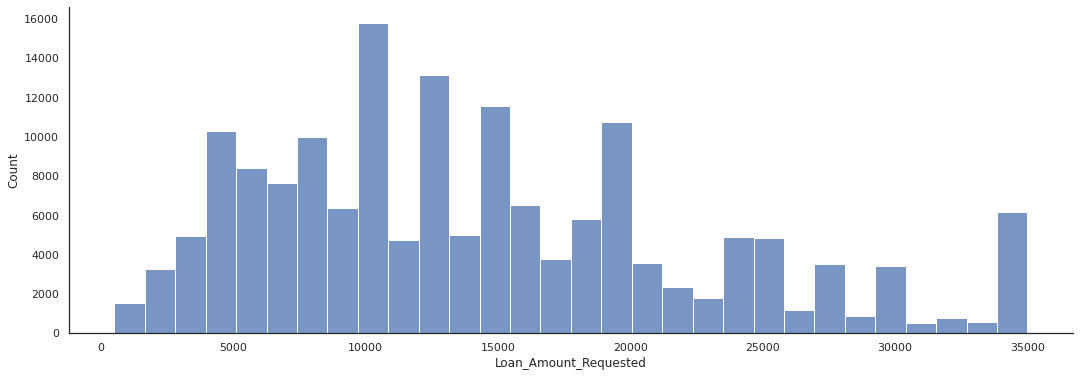

In [ ]:
# Plotting bar chart to show Loan amount requested
sns.histplot(x='Loan_Amount_Requested',data=loans,palette='mako',bins=30)
sns.despine()

The most loan Amount value requested is 10000

##### <font color="yellow">Measures of central Tendecy  </font>

In [ ]:
loans.describe()

Loan_ID  Loan_Amount_Requested  ...  Total_Accounts  Interest_Rate
count  1.618170e+05          161817.000000  ...   161817.000000  161817.000000
mean   1.008218e+07           14396.140857  ...       25.090961       2.157616
std    4.742134e+04            8274.095935  ...       11.571250       0.737945
min    1.000000e+07             500.000000  ...        2.000000       1.000000
25%    1.004111e+07            8000.000000  ...       17.000000       2.000000
50%    1.008218e+07           12250.000000  ...       23.000000       2.000000
75%    1.012324e+07           20000.000000  ...       32.000000       3.000000
max    1.016431e+07           35000.000000  ...      156.000000       3.000000

[8 rows x 9 columns]

In [ ]:
# mean, mode and median Annual income

print('Mean Annual income is ' + str(loans.Annual_Income.mean()))
print('Median Annual income is ' + str(loans.Annual_Income.median()))
print('Mode Annual income is ' + str(loans.Annual_Income.mode()))

Mean Annual income is 73294.60892535724
Median Annual income is 65000.0
Mode Annual income is 0    60000.0
dtype: float64


In [ ]:
# mean, mode and median Total accounts

print('Mean  Total accounts is ' + str(loans.Total_Accounts.mean()))
print('Median Total accounts is ' + str(loans.Total_Accounts.median()))
print('Mode  Total accounts is ' + str(loans.Total_Accounts.mode()))

Mean  Total accounts is 25.09096077667983
Median Total accounts is 23.0
Mode  Total accounts is 0    21
dtype: int64




* We can observe that the standard deviation of loan amount requeste being too high at 8281.9.This can be due to the fact that minimum loan requested is 500 and maximum is 35000.


### <font color=”green”>Bivariate Analysis</font>>
<font color="yellow">Comparison Graphs </font>

 **Ploting the bivariate summaries and recording observations**

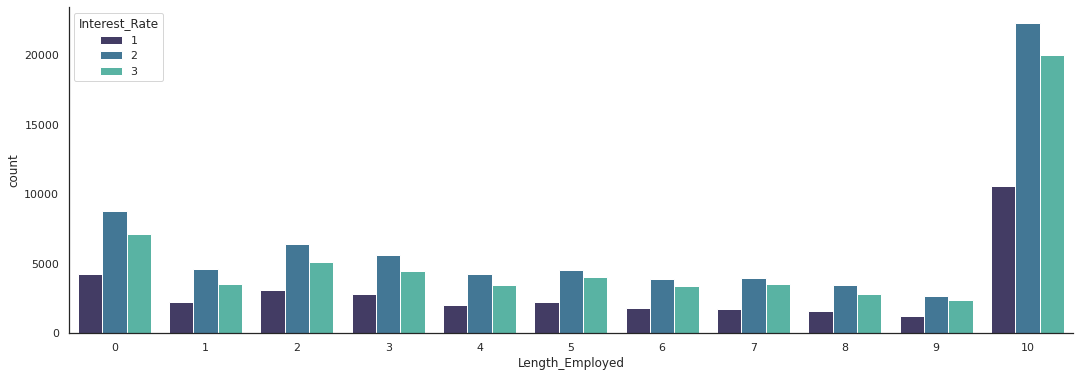

In [ ]:
sns.countplot(data=loans,x='Length_Employed',hue='Interest_Rate',palette='mako')
sns.despine()

The clients who have been employed for 10 years or longer were observed to have the medium to highest interest rate.
Also the clients employed for less than one year also had high interest rate.

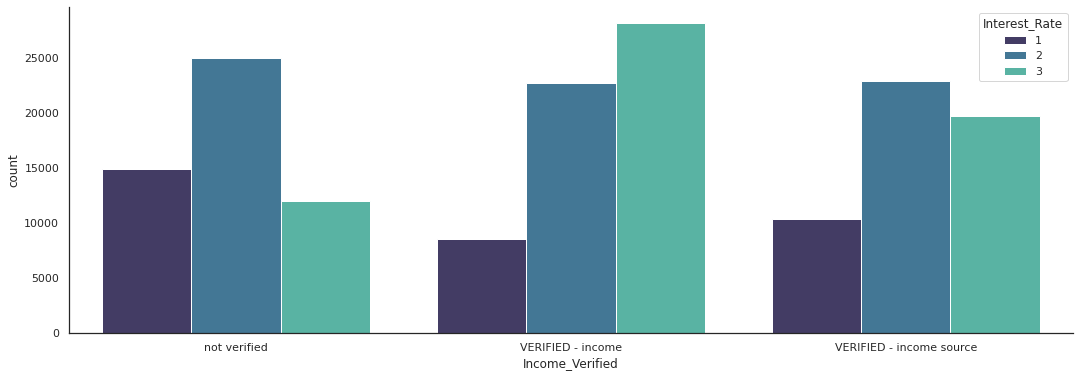

In [ ]:
sns.countplot(x='Income_Verified',data=loans,hue='Interest_Rate',palette='mako')
sns.despine()

> * Clients without vefified sources of income dont have a very high interest rate 
> * Clients with verified sources of high have high interest rates 
> * clients with verified income source dont have a high interest rates

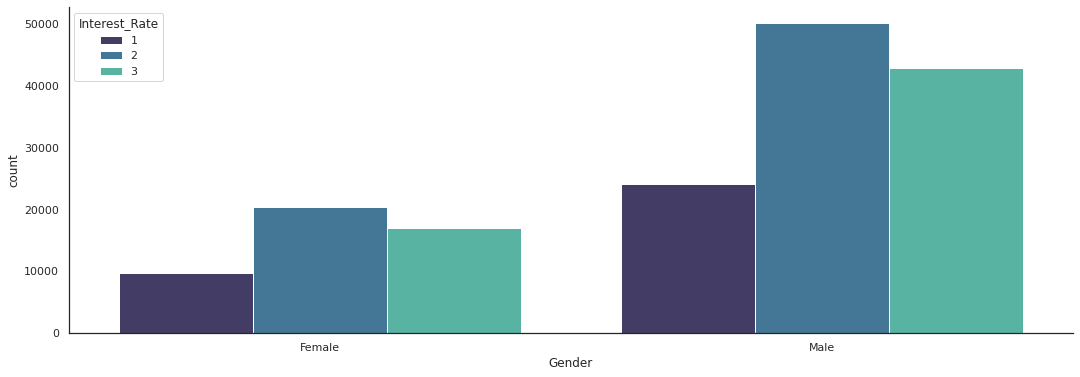

In [ ]:
sns.countplot(x='Gender',data=loans,hue='Interest_Rate',palette='mako')
sns.despine()

> * For all interes high,low,and medium male clients have the highest interest rates

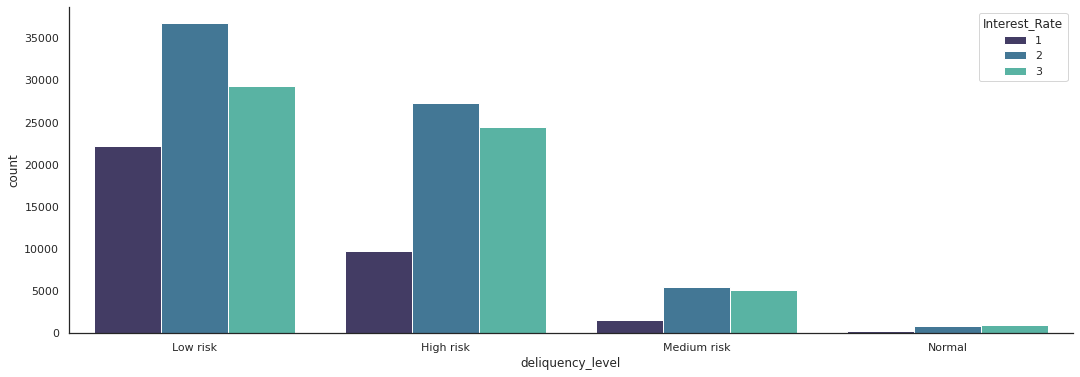

In [ ]:
sns.countplot(x='deliquency_level',data=loans,hue='Interest_Rate',palette='mako')
sns.despine()

> * low risk clients have the highest interest rate

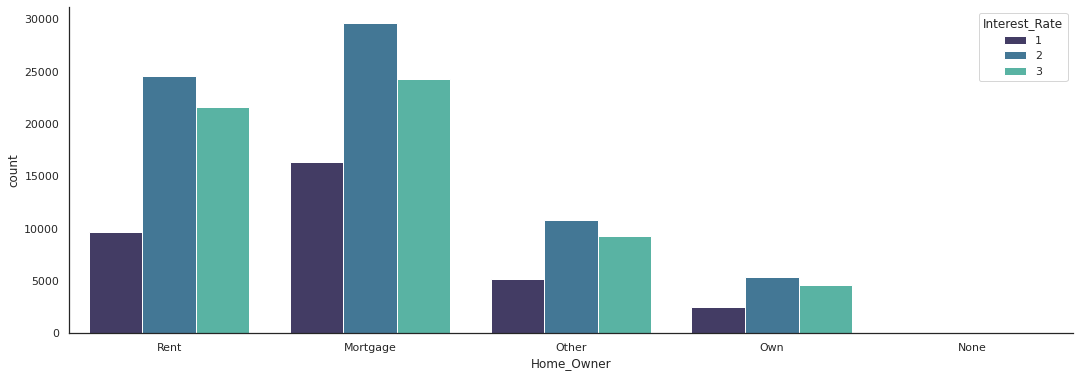

In [ ]:
sns.countplot(x='Home_Owner',data=loans,hue='Interest_Rate',palette='mako')
sns.despine()

Clients with Mortage Loans have the highest interest rate followed by those who pay rent

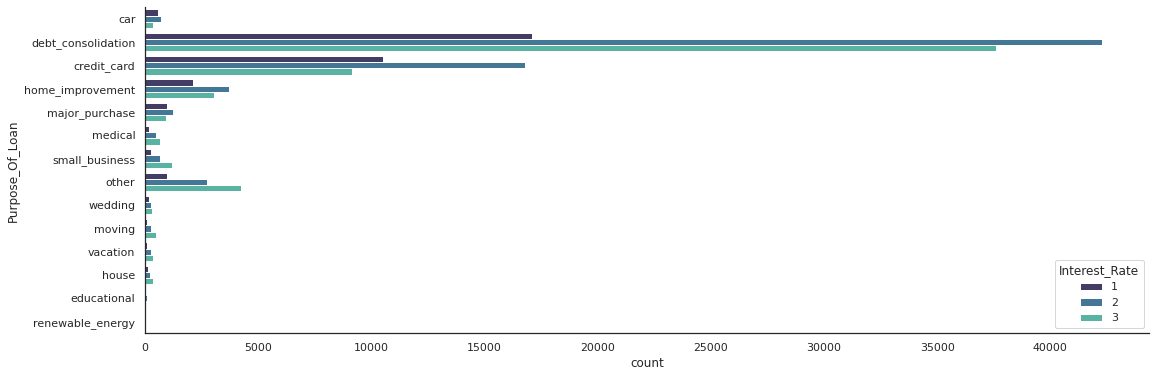

In [ ]:
sns.countplot(y='Purpose_Of_Loan',data=loans,hue='Interest_Rate',palette='mako')
sns.despine()

Most loans were given for debt consolidation and were seen to have the highest interest rate

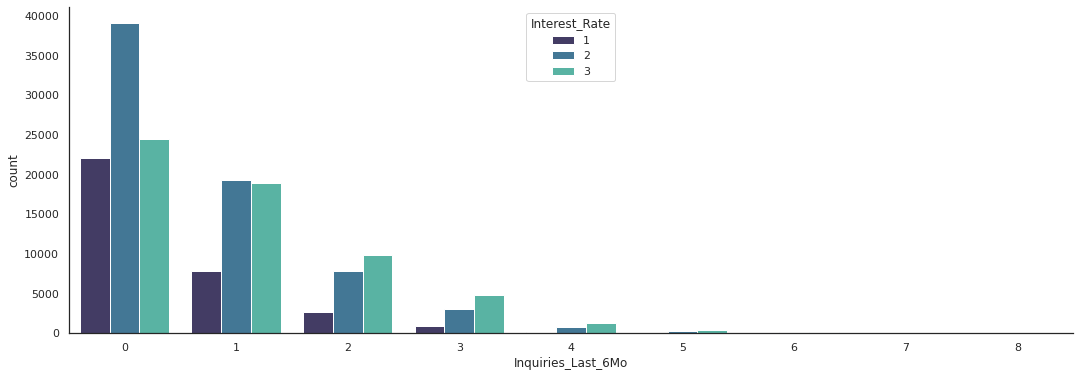

In [ ]:
sns.countplot(x='Inquiries_Last_6Mo',data=loans,hue='Interest_Rate',palette='mako')
sns.despine()

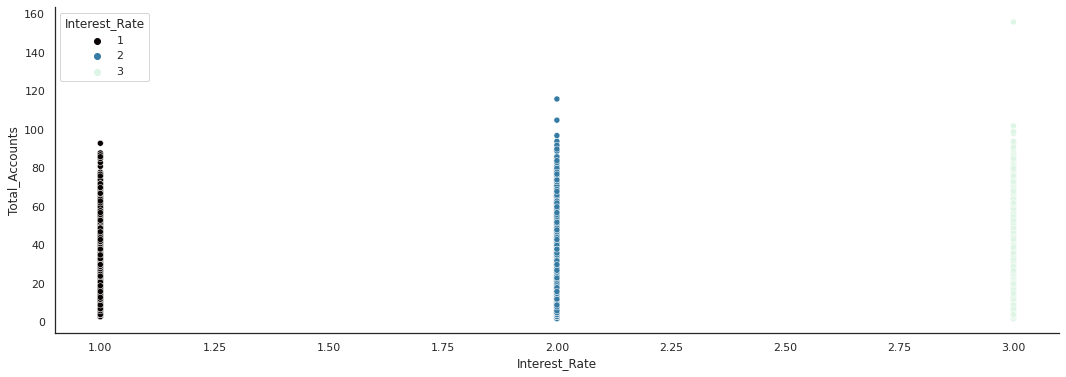

In [ ]:
sns.scatterplot(x='Interest_Rate',y='Total_Accounts',data=loans,hue='Interest_Rate',palette='mako')
sns.despine()

No relationship was observed between the total number of accounts and the interest rate.

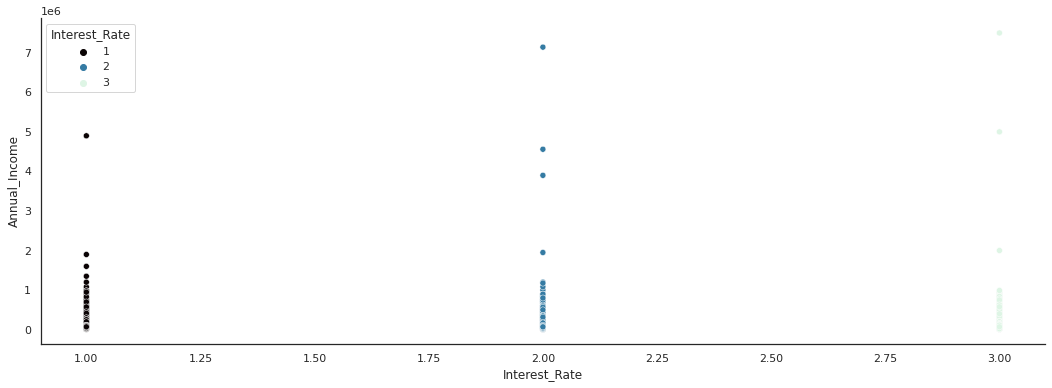

In [ ]:
sns.scatterplot(x='Interest_Rate',y='Annual_Income',data=loans,hue='Interest_Rate',palette='mako')
sns.despine()

> * there is no relationship between the loan interest rate and annual income

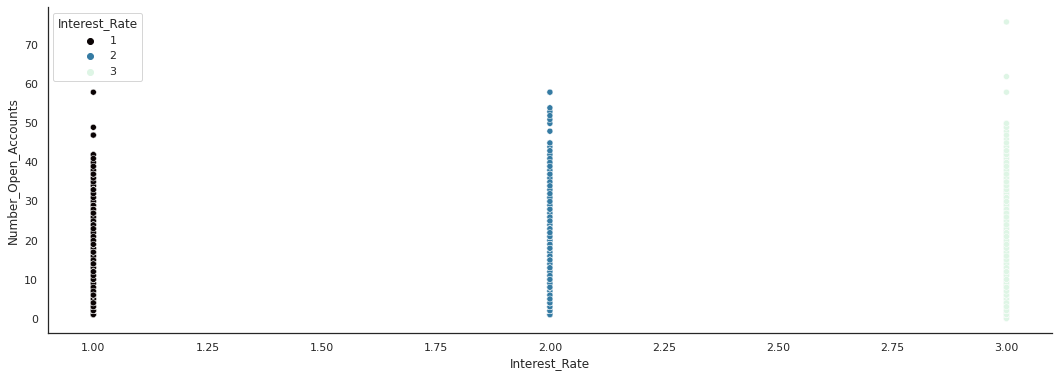

In [ ]:
sns.scatterplot(x='Interest_Rate',y='Number_Open_Accounts',data=loans,hue='Interest_Rate',palette='mako')
sns.despine()

There is no relationship observed between the number of accounts open and the interest rate.

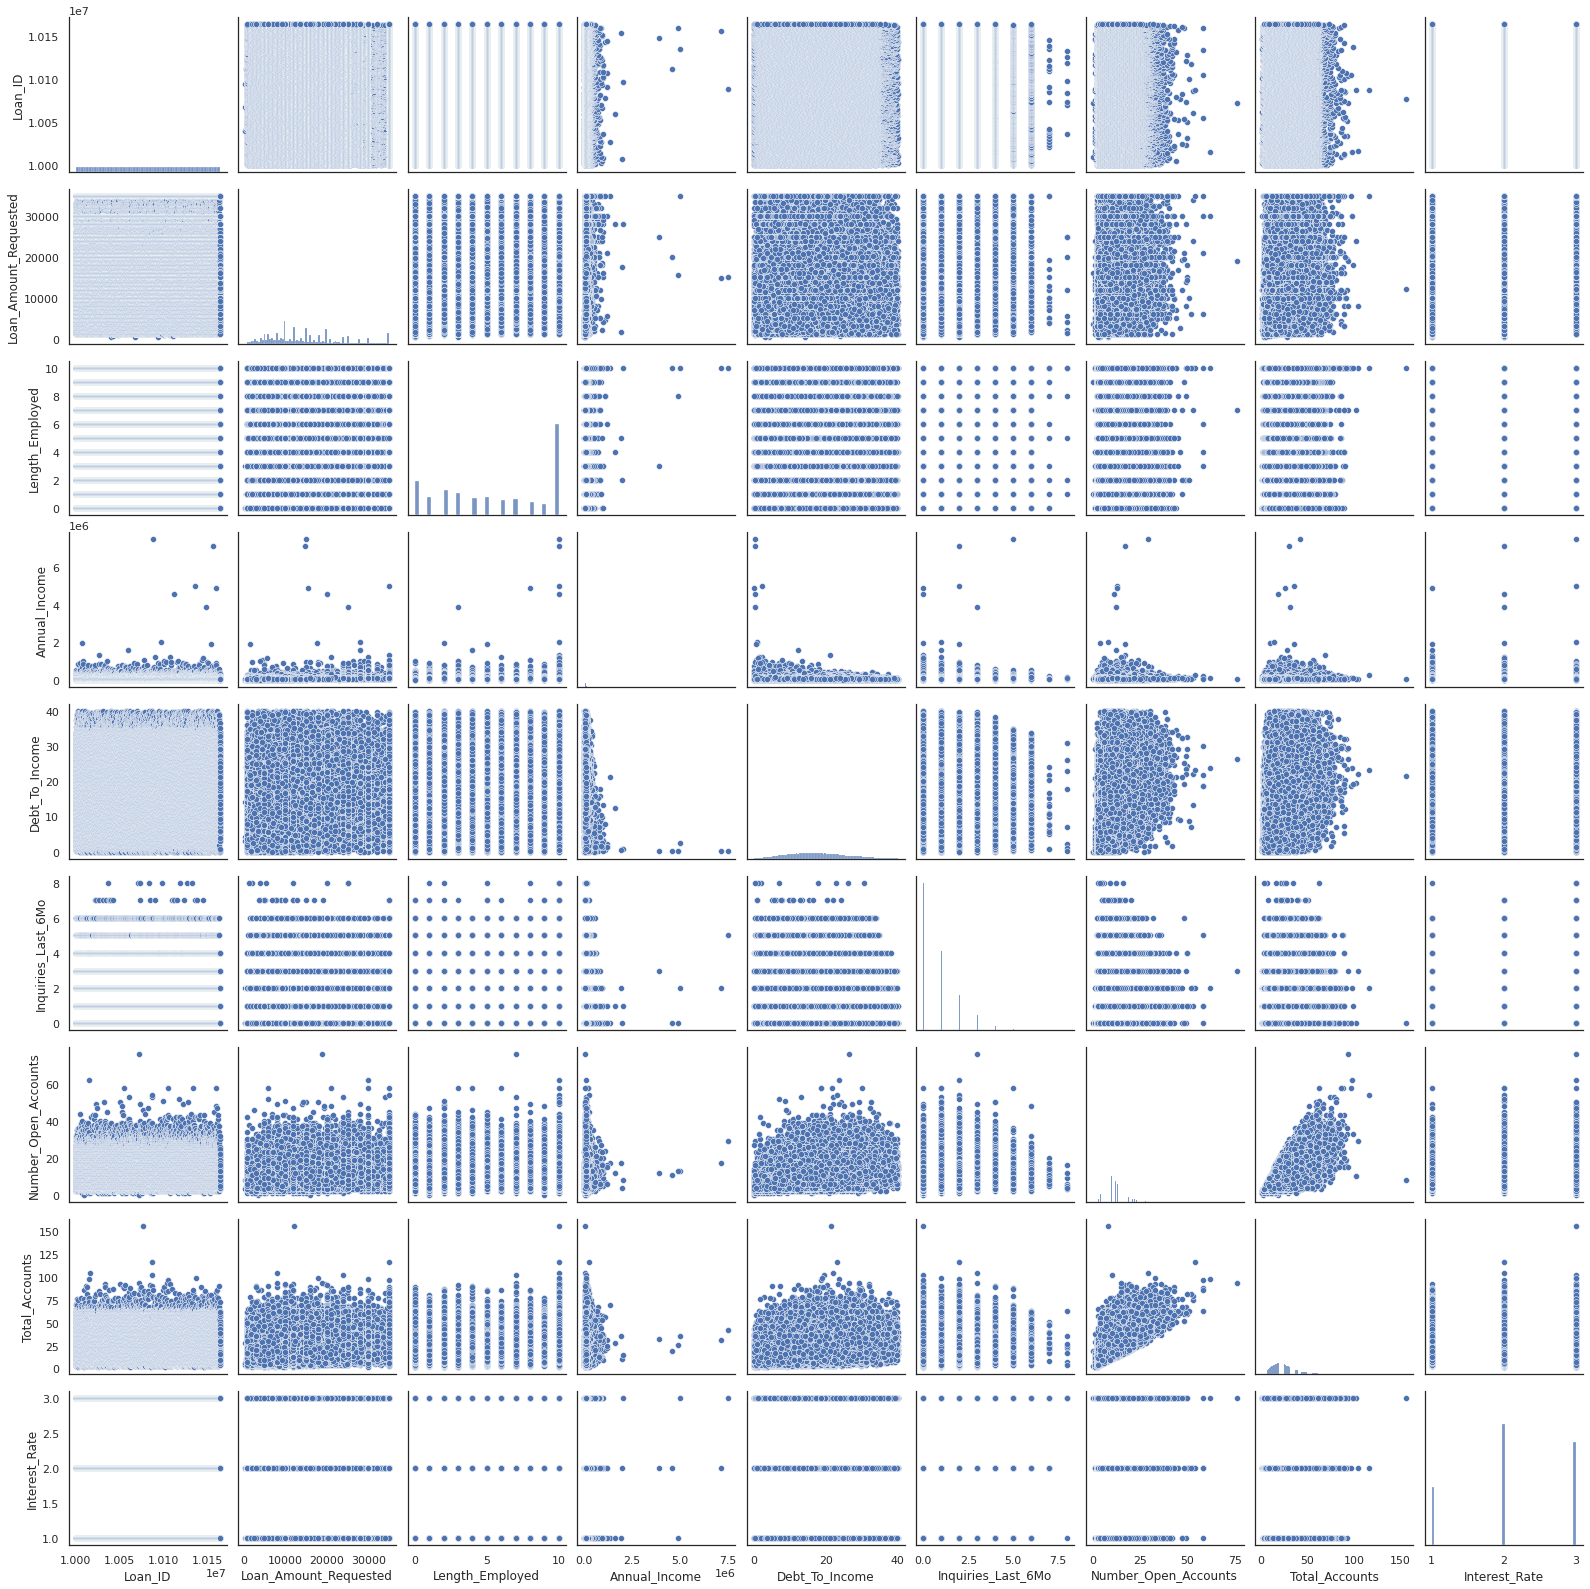

In [ ]:
# Ploting the bivariate summaries and recording observations
#
sns.pairplot(loans)
plt.show()

> * From the above pairplots we can observe that the only variables with a relationship were number of open accounts and total accounts.
>* All other variables had little or no relationship 
> * We plotted the correlation heatmap to confirm the above

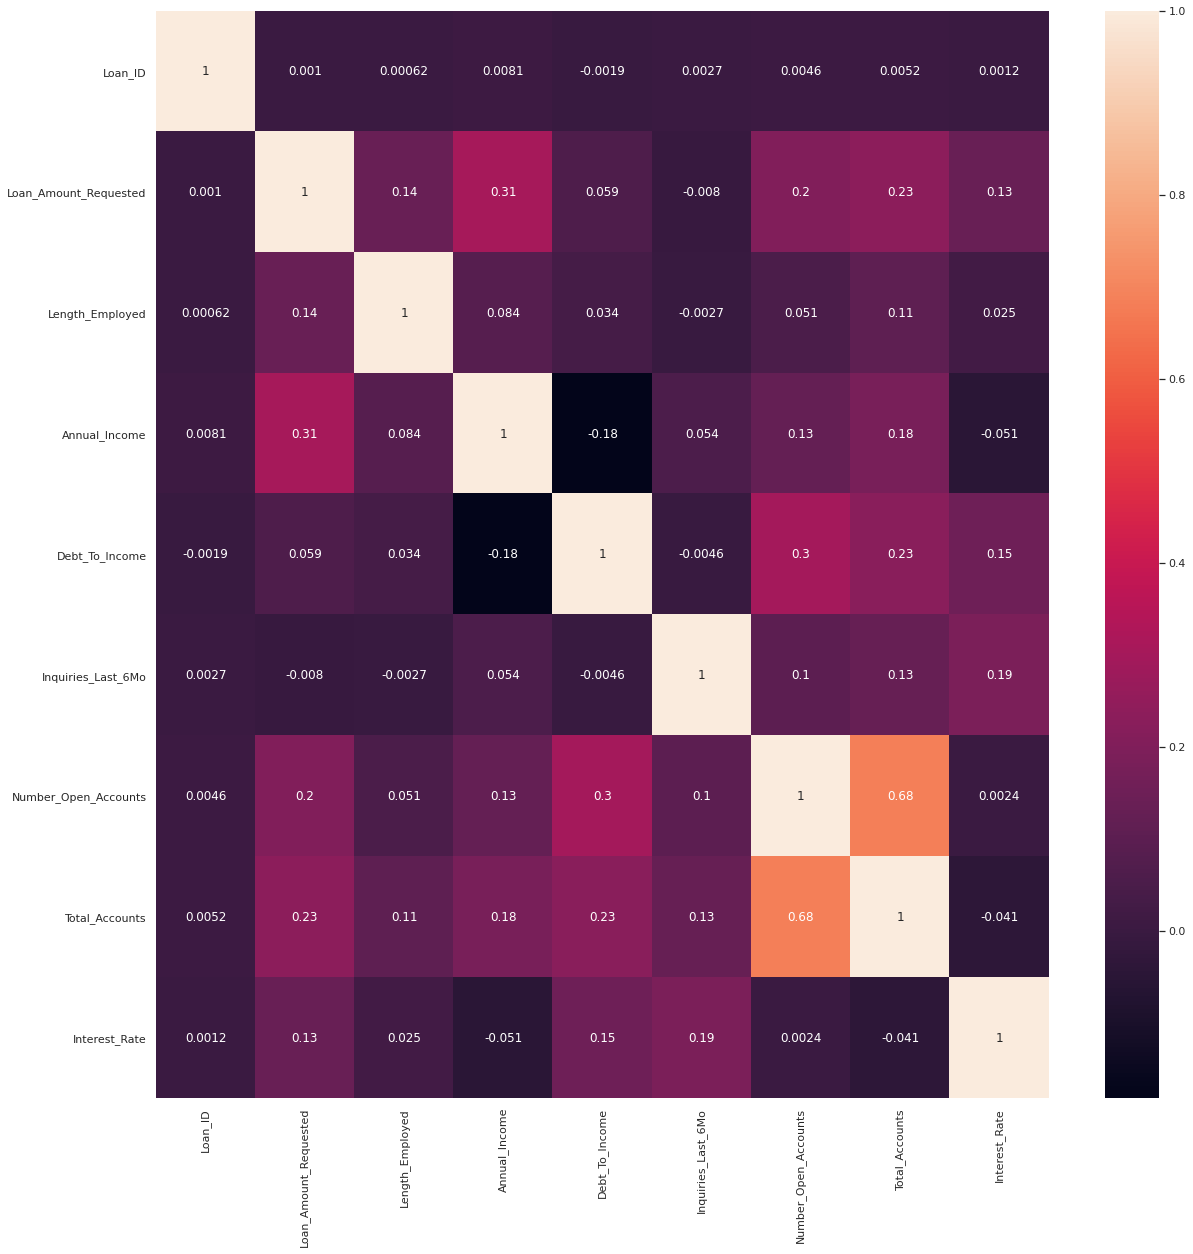

In [ ]:
# Plotting the Pearson correlation coefficient among variables
plt.figure(figsize=(20, 20))
sns.heatmap(loans.corr(),annot=True)
plt.show()

> * This further confirmed the columns total_accounts and number of open accounts are highly correalted with a coefficient of 0.68.no other columns are highly correlated

### <font color=”green”>Multivariate Analysis</font>

### <font color="yellow">3-D comparison plots </font>

Ill be out for a while if you can please endelea

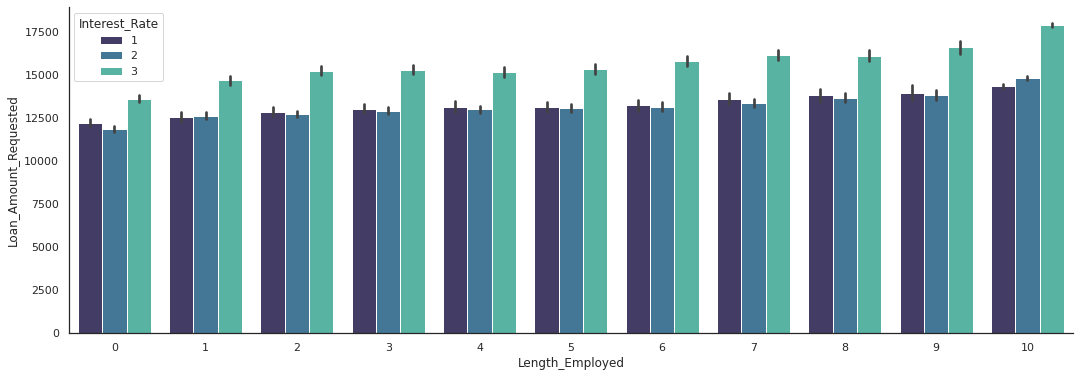

In [ ]:
sns.barplot(data=loans,x='Length_Employed',y='Loan_Amount_Requested',hue='Interest_Rate',palette='mako')
sns.despine()

> We observe that the more an employeee stays higher the loan requested is and the higher the interest rate category 3 becomes


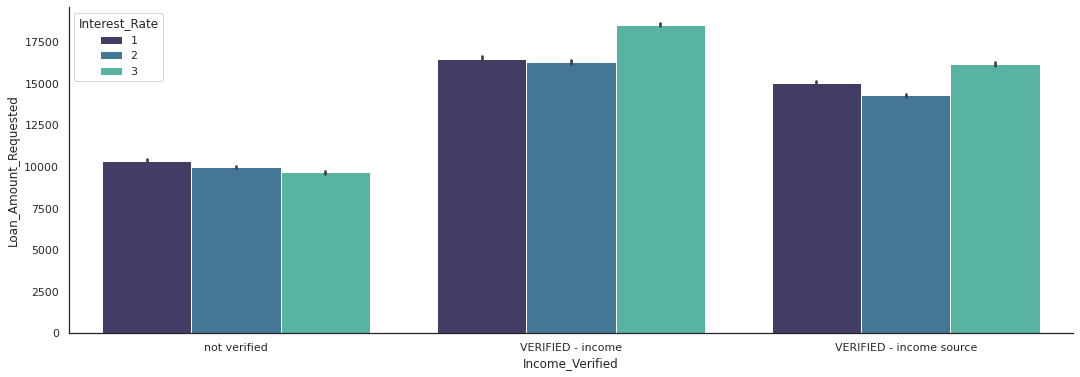

In [ ]:
sns.barplot(data=loans,x='Income_Verified',y='Loan_Amount_Requested',hue='Interest_Rate',palette='mako')
sns.despine()

>* Income is salary payable by end month while income source verified extra income coming through the employess account that is confirmed to be in Existence.And we realise that employees with extra income source have a lower lon demands than ones without.
> * the employees withincome source have lower interest rates from all three categories


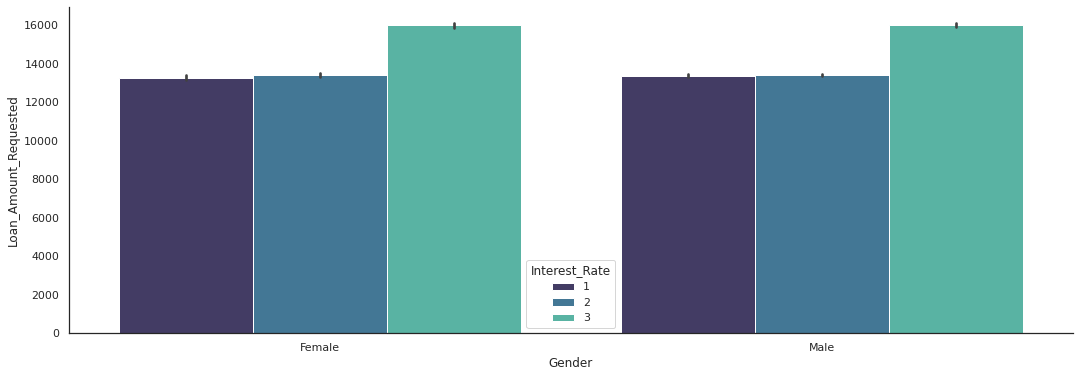

In [ ]:
sns.barplot(data=loans,x='Gender',y='Loan_Amount_Requested',hue='Interest_Rate',palette='mako')
sns.despine()

> Loan requsted is equal among all genders and interest rate is highest in category 3 for both genders.

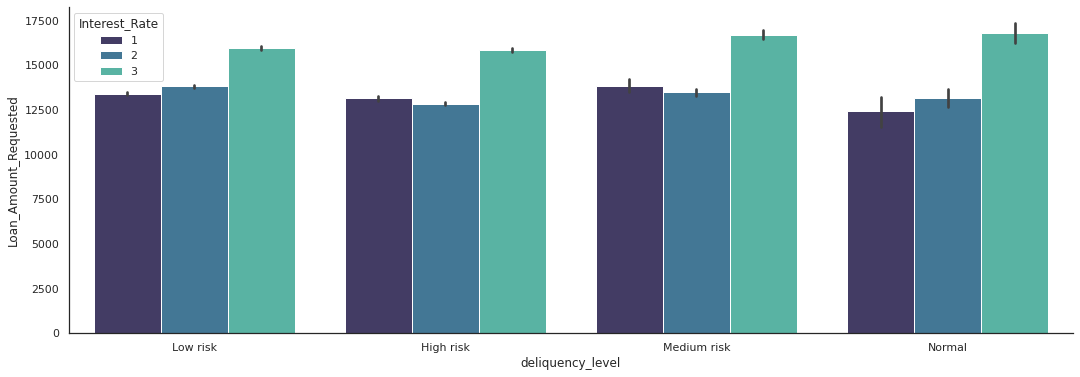

In [ ]:
sns.barplot(data=loans,x='deliquency_level',y='Loan_Amount_Requested',hue='Interest_Rate',palette='mako')
sns.despine()

>Loanrequested is the same among all levels of loan defaulters but aswe can see the interest rates vary fairly with category 1 and 3 being highest at medium risk defaulter rate and category 2 being highest at low risk.

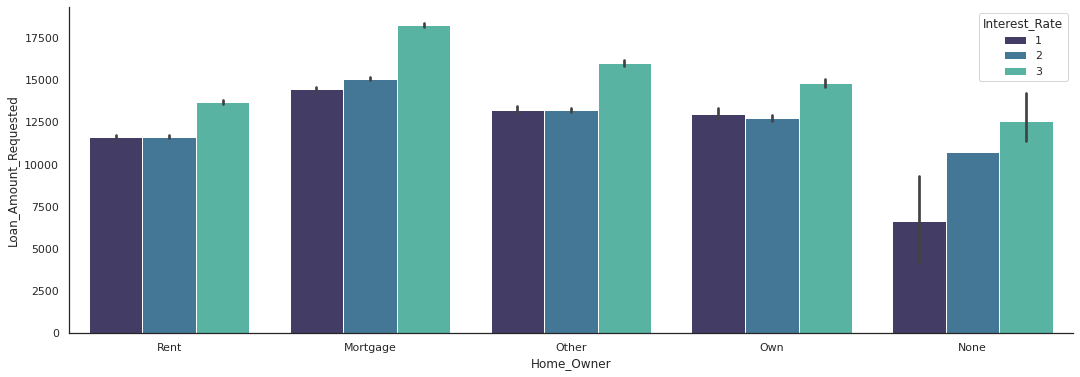

In [ ]:
sns.barplot(data=loans,x='Home_Owner',y='Loan_Amount_Requested',hue='Interest_Rate',palette='mako')
sns.despine()

> mortgage home owners have the highest loan requests and highest interest rates in all three categories.

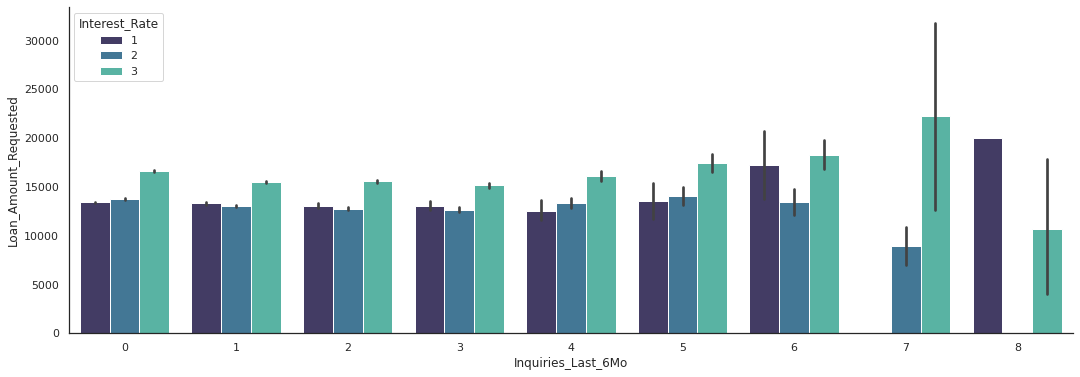

In [ ]:
sns.barplot(data=loans,x='Inquiries_Last_6Mo',y='Loan_Amount_Requested',hue='Interest_Rate',palette='mako')
sns.despine()

> * clients who enquired about loans in the last 6 months before the current loan request have fairly the same loan requests and interest rates in all 3 categories
> * clients who enquired before 6 months have high loans which also attract high interest in some categories.And all interest rates categories apply here.

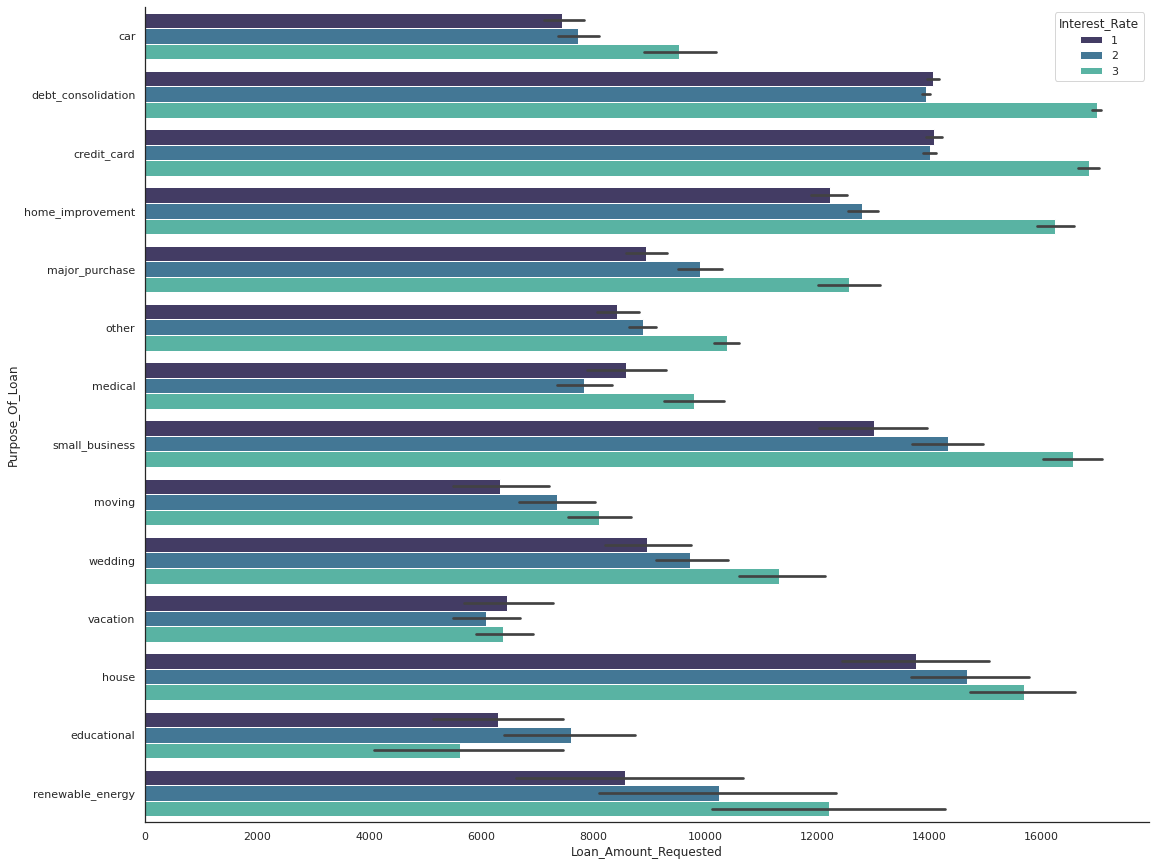

In [ ]:
sns.set(rc={'figure.figsize':(18,15)},style="white")
sns.barplot(data=loans,y='Purpose_Of_Loan',x='Loan_Amount_Requested',hue='Interest_Rate',palette='mako')
sns.despine()

> * Loans for temporary purposes like education,vacation and moving have low request amounts thus attracting low interest rates in all three categories.(all short term loans)
> * long term purposes like house,small business,home improvements and debt consolidation have high request loan amounts thus attracting high interest rates in all 3 categories.
> * Renewable energy ,medical,wedding,car and major purchase have medium amount requests thus also attracting medium interest rates.
> * credit cards are short term loans but we can see they have very high request amounts and also very high interest rates.
>* this means that priority of most our clients in our database is to clear earlier loans nad remain with one loan which inturn increases what they get monthly but also short term loans like credit cards are more popular.

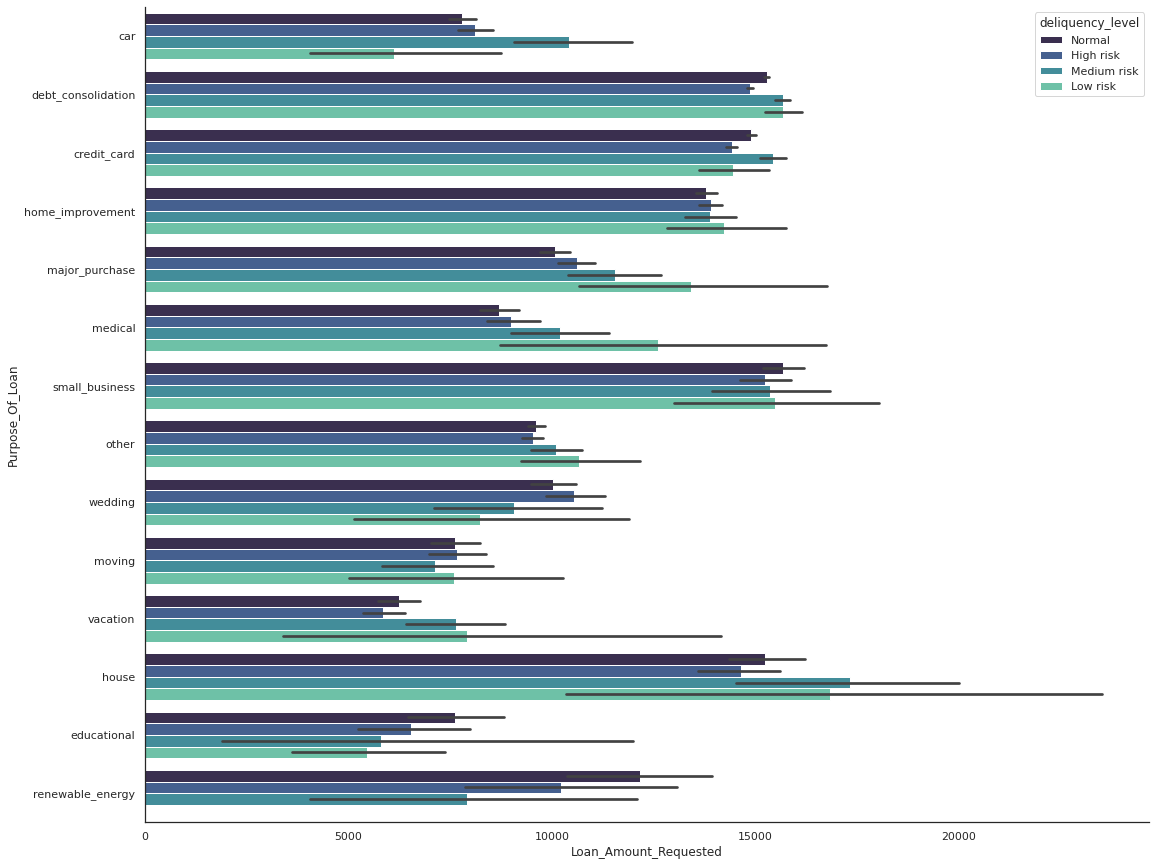

In [ ]:
sns.set(rc={'figure.figsize':(18,15)},style="white")
sns.barplot(data=loans,y='Purpose_Of_Loan',x='Loan_Amount_Requested',hue='deliquency_level',palette='mako')
sns.despine()

## <font color=”green”>Analysis Recommendations</font>


>* First we realized that interest rate has a class imbalance that has to addressed.
 >* The bank should consinder marketing the short term loans that are more purpose driven like vacation loans,education loan and medical loans which have low default rate to clients.
> * Credit cards loans is good buiness for the bank since they are short term loans that clients are willingto pay at high rates the loan salespeople should be trained to get the high defaulters to take up this loans.
> * most defaulters are clients who take loans to start small business and also most non-defaulters are in this category followed by debt consolidation and credit cards.
> * we can see that clients who take loans for medical purposes pay off the highest
> * we can also see that most short term loans like car,vacation which have low amount request are paid off fairly(50/50).
> * vacation loans have the lowest defaulters 
> * credit cards consindering are short term have very high requests and very high default rate.

## <font color=”green”>Dealing with Imbalanceness</font>
#### <font color="yellow">Upsampling and Undersampling</font>

>* Resampling
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling)

>* The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.preprocessing import LabelEncoder
loans['Interest_Rate'] = loans['Interest_Rate'].astype('category')
for_model_lab_ = loans.drop('Loan_ID',axis=1)
le = LabelEncoder()
for name in ('Home_Owner','Gender','Income_Verified','Purpose_Of_Loan','deliquency_level'):
  labeled = le.fit_transform(loans[name])
  for_model_lab_[name] = labeled
  for_model_lab_[name]=for_model_lab_[name].astype('category')
  print(loans[name].value_counts())
  print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
  print(for_model_lab_[name].value_counts())
  print('********************************************************')

Mortgage    69369
Rent        55135
Other       25004
Own         12299
None           10
Name: Home_Owner, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
0    69369
4    55135
2    25004
3    12299
1       10
Name: Home_Owner, dtype: int64
********************************************************
Male      115725
Female     46092
Name: Gender, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
1    115725
0     46092
Name: Gender, dtype: int64
********************************************************
VERIFIED - income           58500
VERIFIED - income source    52249
not verified                51068
Name: Income_Verified, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
0    58500
1    52249
2    51068
Name: Income_Verified, dtype: int64
********************************************************
debt_consolidation    96971
credit_card           36473
home_improvement       8882
other                  7985
major_purchase         3136
small_business         2151
car            

In [ ]:
x=loan_model.drop(['Interest_Rate',],axis=1)
y=loan_model['Interest_Rate']
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
np.bincount(y_train)

array([    0, 25062, 52368, 43932])

In [ ]:
# Splitting the data into a training set and a test set (using a 80-20 split)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [ ]:
# define undersampling strategy
undersample = RandomUnderSampler()

# fit and apply the transform
x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

# summarize class distribution
print("After undersampling: ", np.bincount(y_train_under))

After undersampling:  [    0 26570 26570 26570]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# define oversampling strategy
oversample = RandomOverSampler()

# fit and apply the transform
x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)

# summarize class distribution
print("After oversampling: ", np.bincount(y_train_over))

After oversampling:  [    0 55854 55854 55854]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Since our data was not overly imbalanced and using the undersampling we loose almost half of our data using the oversampling would be the best method to use.

## <font color=”green”>Dimensionality Reduction</font>
#### <font color="yellow">Linear Discriminant Analysis</font>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
# Feature Scaling 

scaler = StandardScaler()
scaler.fit(x_train)

x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

# Peforming LDA

lda = LDA(n_components=8)
x_train = lda.fit_transform(x_train, y_train)
x_test= lda.transform(x_test)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 3 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [ ]:
# Checking the most important features
feature_importance = pd.DataFrame(index = x.columns.values, data = lda.coef_[1].T).sort_values(1, ascending= False)

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::1]
print(indices)

                       0
Total_Accounts         0
deliquency_level       0
Income_Verified        0
Annual_Income          0
Gender                 0
Number_Open_Accounts   0
Length_Employed        0
Home_Owner             0
Purpose_Of_Loan        0
Loan_Amount_Requested  0
Debt_To_Income         0
Inquiries_Last_6Mo     0


In [ ]:
# Peforming LDA
lda = LDA(n_components=1,solver='svd', store_covariance=False)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [ ]:
#percentage of variances explained for each components
k=print('explained variance ratio(first two components):%s'

% str (lda.explained_variance_ratio_))

explained variance ratio(first two components):[0.93741076]


## <font color=”green”>Checking for heteroscedasticity</font>

> * Homoscedasticity means that the residuals have equal or almost equal variance across the regression line.

>* Conditional variance is the variability that you see in the dependent variable y for each value of the explanatory variables X.

>* The opposite of heteroscedatiscity is homoscedasticity where the variance is constant i.e

>* By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

**<font color="Red">Detecting heteroscedasticity!</font>**

Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
loan_model = loans[['Loan_Amount_Requested','Debt_To_Income','Annual_Income','Income_Verified','Inquiries_Last_6Mo','Purpose_Of_Loan','Total_Accounts','deliquency_level','Interest_Rate']]
loan_model.head()

Loan_Amount_Requested  Debt_To_Income  ...  deliquency_level Interest_Rate
0                   7000           18.37  ...            Normal             1
1                  30000           14.93  ...         High risk             3
2                  24725           15.88  ...            Normal             3
3                  16000           14.34  ...            Normal             3
4                  17000           22.17  ...            Normal             1

[5 rows x 9 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
loan_model['Interest_Rate'] = loan_model['Interest_Rate'].astype('category')
le = LabelEncoder()
for name in ('Income_Verified','Purpose_Of_Loan','deliquency_level'):
  labeled = le.fit_transform(loan_model[name])
  loan_model[name] = labeled
  #label encoding above ^
  loan_model[name] = loan_model[name].astype('category')
  # Changing to categorical
  print(loans[name].value_counts())
  print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
  print(loan_model[name].value_counts())
  print('********************************************************')

VERIFIED - income           58500
VERIFIED - income source    52249
not verified                51068
Name: Income_Verified, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
0    58500
1    52249
2    51068
Name: Income_Verified, dtype: int64
********************************************************
debt_consolidation    96971
credit_card           36473
home_improvement       8882
other                  7985
major_purchase         3136
small_business         2151
car                    1675
medical                1353
moving                  837
wedding                 732
vacation                725
house                   682
educational             113
renewable_energy        102
Name: Purpose_Of_Loan, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
2     96971
1     36473
4      8882
9      7985
6      3136
11     2151
0      1675
7      1353
8       837
13      732
12      725
5       682
3       113
10      102
Name: Purpose_Of_Loan, dtype: int64
************************

As you will only be dealing with categorical features in this tutorial, it's better to filter them out. You can create a separate DataFrame consisting of only these features by running the following command. The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one.

In [ ]:
loan_model.dtypes

Loan_Amount_Requested       int64
Debt_To_Income            float64
Annual_Income             float64
Income_Verified          category
Inquiries_Last_6Mo          int64
Purpose_Of_Loan          category
Total_Accounts              int64
deliquency_level         category
Interest_Rate            category
dtype: object

In [ ]:
import copy
%matplotlib inline

In [ ]:
cat_loans = loan_model.select_dtypes(include=['category']).copy()
cat_loans.head()

Income_Verified Purpose_Of_Loan deliquency_level Interest_Rate
0               2               0                3             1
1               0               2                0             3
2               1               2                3             3
3               1               2                3             3
4               1               2                3             1

As you will only be dealing with numerical features we will also filter them out. We will create a separate DataFrame consisting of only these features by running the following command. 

In [ ]:
num_loans = loan_model.select_dtypes(include=['int64','float64']).copy()
num_loans.head()

Loan_Amount_Requested  Debt_To_Income  ...  Inquiries_Last_6Mo  Total_Accounts
0                   7000           18.37  ...                   0              14
1                  30000           14.93  ...                   0              24
2                  24725           15.88  ...                   0              16
3                  16000           14.34  ...                   3              22
4                  17000           22.17  ...                   1              30

[5 rows x 5 columns]

 We the split the train and test set 

In [ ]:
x=loan_model.drop(['Interest_Rate',],axis=1)
y=loan_model['Interest_Rate']
x_train,x_test,y_train,y_test=train_test_split(x,y)

<font color="Red">Using Barletts Test</font>

In [ ]:
pip install scipy==1.5.2 pandas==1.1.1 pingouin==0.3.9.

     |████████████████████████████████| 25.9MB 180kB/s 
     |████████████████████████████████| 10.5MB 38.1MB/s 
     |████████████████████████████████| 225kB 49.9MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.9-cp36-none-any.whl size=223375 sha256=3b716fa142c2b6f2b1ae73a3e7a54e7a0be5fad113b0d19fb9278d74f0466c0a
  Stored in directory: /root/.cache/pip/wheels/6c/d7/26/a23b9ed74061adc5cf8f5e016bbe2902a8ebf63b6471047dbc
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=c5c25f0e0041326da9590bd51abdfd219036c069afd9739cd90265b1be26490f
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=2304e60d51c576e68a8654b0bb2aeb9dd149569c72cc44e165c1f105467cff06
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated lit

In [ ]:
import pingouin as pg
from scipy.stats import bartlett
# Bartlett's test in Python with pingouin:
pg.homoscedasticity(loans, method="bartlett", alpha=.05)

T  pval  equal_var
bartlett  49.412143   1.0       True

**Returns:**

**'W/T': Test statistic** (‘W’ for Levene, ‘T’ for Bartlett):Since the test statistic is less than the critical value for alpha we conclude there is no significant difference in the variances. The p-value is also greater than 0.05 which confirms this.

**'pval'** : p-value:The reported p-value is over 0.05. Therefore we accept the null hypothesis that the group variances are equal.and we can see that this proven in the equal_var which is 1


**'equal_var**': True if data has equal variance

So our data is*** Homogenous*** we all good here.

<font color="Red">Using Levene Test</font>

In [ ]:
import pingouin as pg

# Levene's test in Python with pingouin:
pg.homoscedasticity(loans, method="levene", alpha=.05)

W  pval  equal_var
levene  0.000058   1.0       True

**Returns:**

**'W/T': Test statistic** (‘W’ for Levene, ‘T’ for Bartlett):Since the test statistic is less than the critical value for alpha we conclude there is no significant difference in the variances. The p-value is also greater than 0.05 which confirms this.

**'pval'**: p-value:If the p-value test statistic value is greater than alpa 0.05, we can decide that the correlation is an Identical matrix i.e. correlation is present among the variables with a 95% confidence level.

The reported p-value is over 0.05. Therefore we accept the null hypothesis that the group variances are equal.and we can see that this proven in the equal_var which is 1

**'equal_var'**: True if data has equal variance

So our data is ***Homogenous*** we all good here.

## <font color=”green”>Feature Engineering</font>

>  Based on the business knowledge, we can came up with new features that might affect the target variable. Example features we will use and why?:

* loan amount requsted — This helps us know amount the client wants.

* Length Employed —This is the time the clients has been employed.this also tells us that our database has emlployed clients.

* Home-owner — This is the variable is that if this client has assests disposable as collateral if loan amount value is high, the chances are high that a person will repay the loan without default if collateral such as own home or title deed and hence increasing the chances of loan approval.

* annual-income-this variable lets us know the disposable income the client has for one year .The higher the loan request value  chances are high that annual income is high.

* Deliquency level-Showsus the credit history of the borrower and if they are defaulter,helps us categorize them into high or low risk.

> Based on the profile we want to create of our borrower some columns will be dropped automatically :

* loan-id-not needed in analysis or modellling(might need it in the test/train)

* number of open accounts-depending on business understanding this is not useful

* total accounts-depending on business understanding this is not useful

* debt_to_income-this is not useful depending on business understanding

* inquries in the last 6 months-also not useful depending onn business understanding


### <font color=”green”>Feature Selection Engineering</font>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
loans

Loan_ID  Loan_Amount_Requested  ...  Interest_Rate deliquency_level
0       10000001                   7000  ...              1         Low risk
1       10000002                  30000  ...              3        High risk
2       10000003                  24725  ...              3         Low risk
3       10000004                  16000  ...              3         Low risk
4       10000005                  17000  ...              1         Low risk
...          ...                    ...  ...            ...              ...
164304  10164305                  20725  ...              2         Low risk
164305  10164306                   6000  ...              2        High risk
164306  10164307                  20250  ...              1         Low risk
164307  10164308                  10000  ...              3        High risk
164308  10164309                   9250  ...              2         Low risk

[164304 rows x 14 columns]

* <font color='#00e6de'>Label encoding the string columns</font>

In [ ]:
from sklearn.preprocessing import LabelEncoder
loans['Interest_Rate'] = loans['Interest_Rate'].astype('category')
for_model_lab = loans.drop('Loan_ID',axis=1)
le = LabelEncoder()
for name in ('Home_Owner','Gender','Income_Verified','Purpose_Of_Loan','deliquency_level','Gender'):
  labeled = le.fit_transform(loans[name])
  for_model_lab[name] = labeled
  for_model_lab[name]=for_model_lab[name].astype('category')
  print(loans[name].value_counts())
  print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
  print(for_model_lab[name].value_counts())
  print('********************************************************')

Mortgage    70343
Rent        56028
Other       25398
Own         12525
None           10
Name: Home_Owner, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
0    70343
4    56028
2    25398
3    12525
1       10
Name: Home_Owner, dtype: int64
********************************************************
Male      117173
Female     47131
Name: Gender, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
1    117173
0     47131
Name: Gender, dtype: int64
********************************************************
VERIFIED - income           59420
VERIFIED - income source    53013
not verified                51871
Name: Income_Verified, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
0    59420
1    53013
2    51871
Name: Income_Verified, dtype: int64
********************************************************
debt_consolidation    97101
credit_card           36684
home_improvement       9268
other                  8346
major_purchase         3435
small_business         2392
car            

**Checking for Multicollinearity**

In [ ]:
correlations = loan_model.corr()
correlations

Loan_Amount_Requested  ...  Total_Accounts
Loan_Amount_Requested               1.000000  ...        0.233956
Debt_To_Income                      0.059309  ...        0.228286
Annual_Income                       0.306892  ...        0.180369
Inquiries_Last_6Mo                 -0.008030  ...        0.131751
Total_Accounts                      0.233956  ...        1.000000

[5 rows x 5 columns]

**VIF Scores**

In [ ]:
# Use calculated correlations to compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

Loan_Amount_Requested  ...  Total_Accounts
Loan_Amount_Requested               1.155007  ...       -0.197149
Debt_To_Income                     -0.084408  ...       -0.290693
Annual_Income                      -0.337091  ...       -0.194792
Inquiries_Last_6Mo                  0.053109  ...       -0.146103
Total_Accounts                     -0.197149  ...        1.166869

[5 rows x 5 columns]

The VIF score is found along the diagonal from top left to bottom right. Since all the VIF scores are below 5, we can say that there is no multicollinearity thus no alarming correlation between the independent variables.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [ ]:
x_train.shape

(123228, 2)

<font color='#00e6de'>
Lda ended up with a dataset with just 2 attributes, well it cant be helped. Therefore well be checking out feature importances using decision trees and see if there is a trend.
</font>

In [ ]:
decision_classifier = DecisionTreeClassifier(max_depth=10)
random_forest_classifier = RandomForestClassifier( max_depth=10)
gbm_classifier = GradientBoostingClassifier( max_depth=10)

decision_classifier.fit(x, y)
random_forest_classifier.fit(x, y)
gbm_classifier.fit(x, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

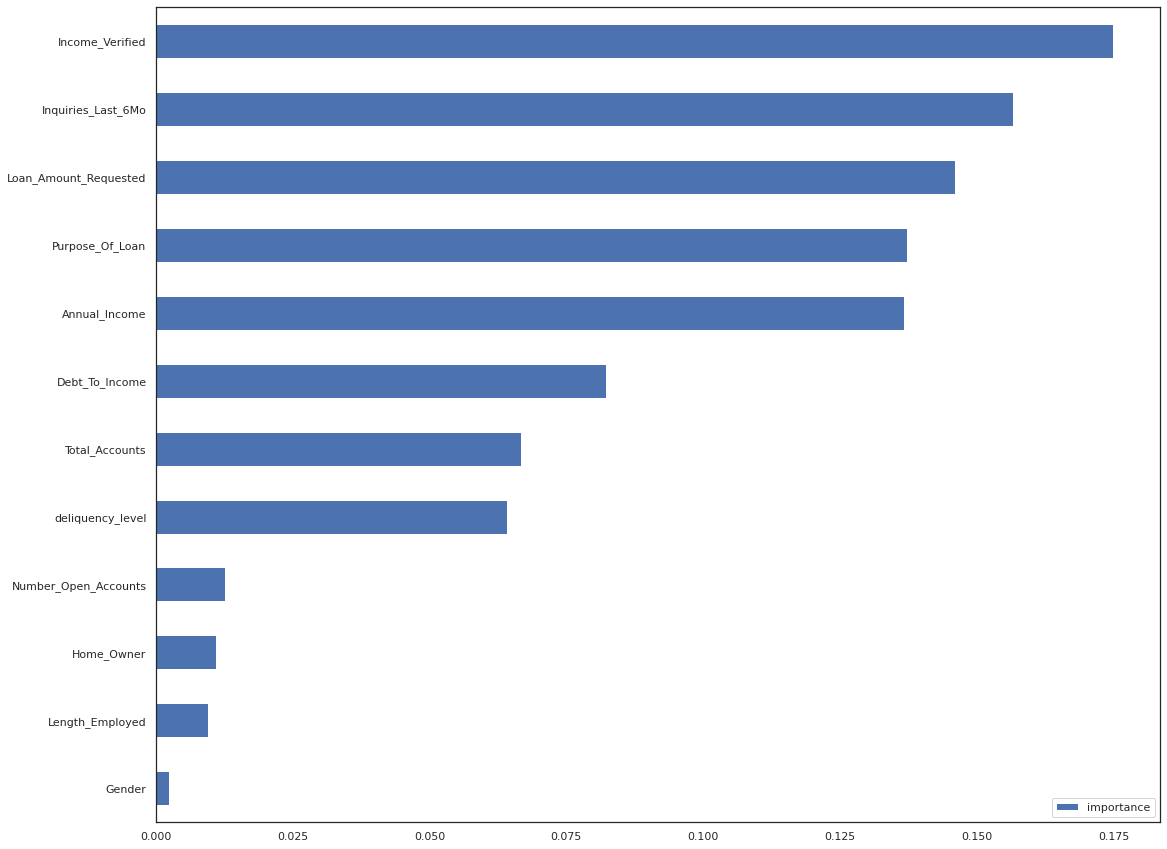

In [ ]:
pd.DataFrame({'importance' : decision_classifier.feature_importances_}, index=x.columns).sort_values(by='importance').plot(kind='barh')

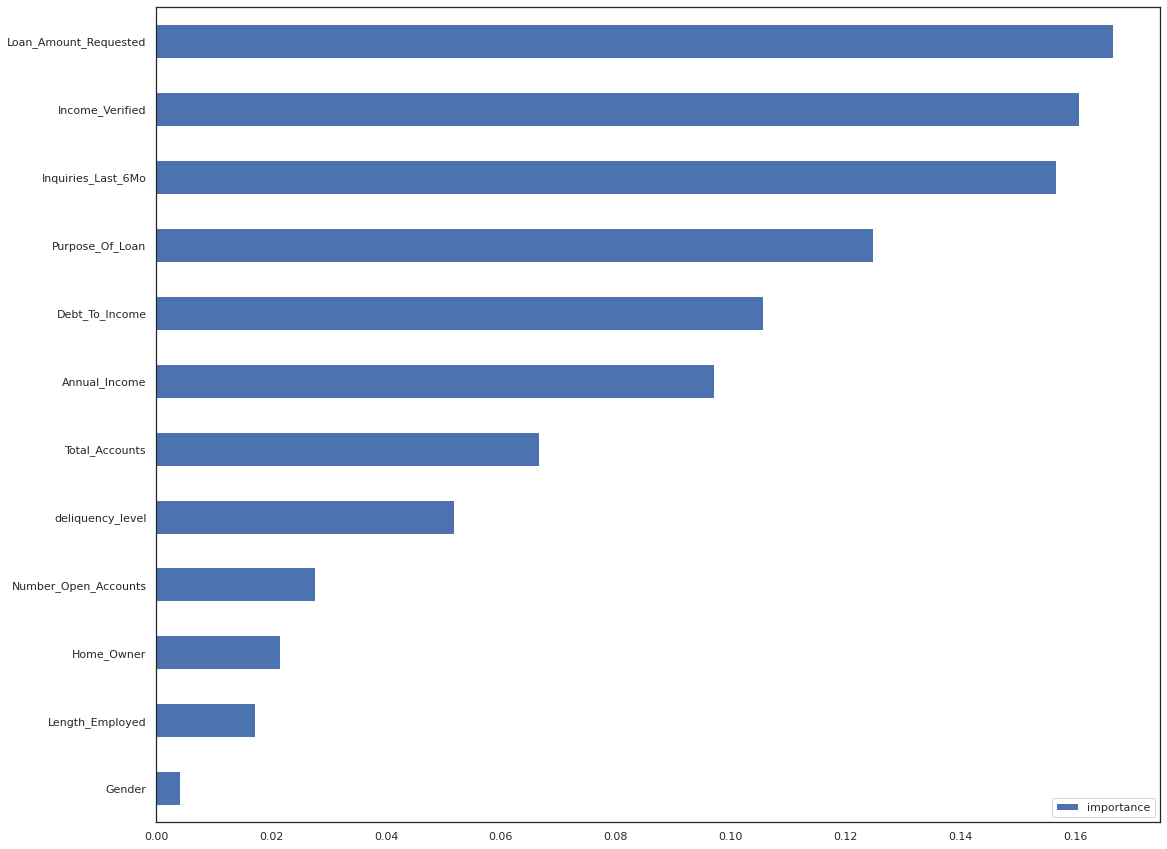

In [ ]:
pd.DataFrame({'importance' : random_forest_classifier.feature_importances_}, index=x.columns).sort_values(by='importance').plot(kind='barh')

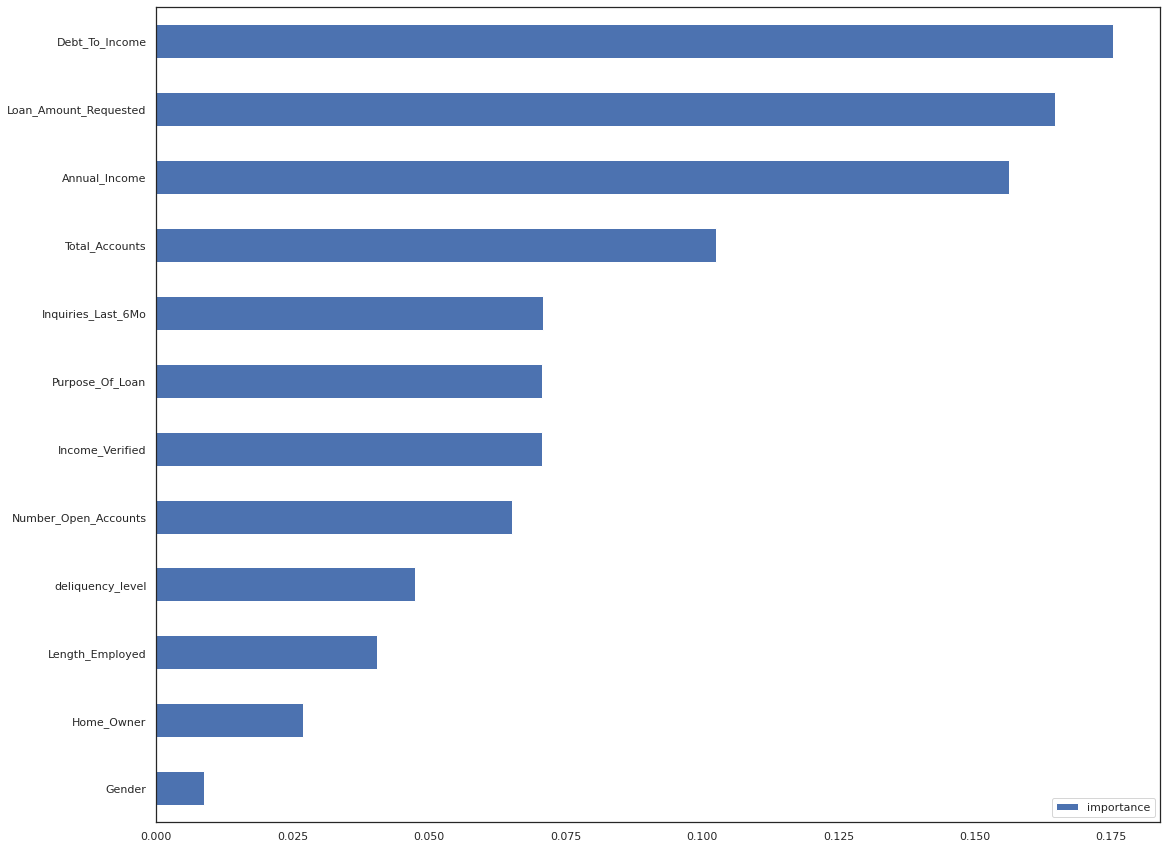

In [ ]:
pd.DataFrame({'importance' : gbm_classifier.feature_importances_}, index=x.columns).sort_values(by='importance').plot(kind='barh')

> <font color='#00e6de'></font>
<font color='#fa005c'></font>
<font color='#00e6de'>
From all the feature importances: <font color='#fa005c'> Number_Open_Accounts ,Home_Owner ,Length_Employed and Gender </font> are the least important with less than 5% importance in the entire dataset they explain <font color='#fa005c'> 4.7543, 8.2875, 6.5168 </font> respectively
</font>


## <font color=”green”>KNN model</font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_test)


In [ ]:
# checking the metrics
print('KNN classifier')
print(metrics.accuracy_score(knn_y_pred,y_test))

KNN classifier
0.4117167222840193


In [ ]:
print(metrics.confusion_matrix(y_test, knn_y_pred))

[[2429 4402 1504]
 [4310 9196 3918]
 [2795 6870 5031]]


In [ ]:
print(metrics.classification_report(knn_y_pred, y_test))

              precision    recall  f1-score   support

           1       0.29      0.25      0.27      9534
           2       0.53      0.45      0.49     20468
           3       0.34      0.48      0.40     10453

    accuracy                           0.41     40455
   macro avg       0.39      0.40      0.39     40455
weighted avg       0.42      0.41      0.41     40455



> Like the other models there is a problem in predicting interest rate 1 because of the imbalance however so far this is the worst performing, the f1 score is so low., this could be because of the imbalance in the data

* the biggest downside to knn is that its sensitive to outliers hence it is necessary to scale and normalize the dataset to minimise the outliers in the data.

In [ ]:
from sklearn.preprocessing import Normalizer
# data normalization with sklearn
from sklearn.preprocessing import StandardScaler

In [ ]:
# fit scaler on training data
scl = StandardScaler().fit(x)
# transform training data
x_train = scl.transform(x_train)
# transform testing dataabs
x_test = scl.transform(x_test)

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import StandardScaler
# fit scaler on training data
norm = Normalizer().fit(x_train)
# transform training data
x_train = norm.transform(x_train)
# transform testing dataabs
x_test= norm.transform(x_test)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_y_pred2 = knn.predict(x_test)


In [ ]:
# checking the metrics
print('KNN classifier')
print(metrics.accuracy_score(knn_y_pred2,y_test))

KNN classifier
0.4447657891484365


In [ ]:
print(metrics.classification_report(knn_y_pred2, y_test))

              precision    recall  f1-score   support

           1       0.35      0.33      0.34      8830
           2       0.51      0.46      0.48     19326
           3       0.42      0.51      0.46     12299

    accuracy                           0.44     40455
   macro avg       0.43      0.43      0.43     40455
weighted avg       0.45      0.44      0.44     40455



> Scaling and normalizing the dataset did not do much to improve the model.

> We will be going the next option to correct the imbalance in the dataset to see if it improves the dataset

###Using oversampler

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_over, y_train_over)
knn_y_pred3 = knn.predict(x_test)


In [ ]:
# checking the metrics
print('KNN classifier')
print(metrics.accuracy_score(knn_y_pred3,y_test))

KNN classifier
0.2060313929056977


In [ ]:
print(metrics.classification_report(knn_y_pred3, y_test))

              precision    recall  f1-score   support

           1       1.00      0.21      0.34     40455
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.21     40455
   macro avg       0.33      0.07      0.11     40455
weighted avg       1.00      0.21      0.34     40455



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> Resampling techniques seem to make the model worse overall, but there f1 scores became more balanced, irregardless we will stick to the original scaled and normalised data



###using undersampler/strata

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_under, y_train_under)
knn_y_pred4= knn.predict(x_test)

In [ ]:
# checking the metrics
print('KNN classifier')
print(metrics.accuracy_score(knn_y_pred4,y_test))

KNN classifier
0.43055246570263256


In [ ]:
print(metrics.confusion_matrix(y_test, knn_y_pred4))

[[    0  8282     0]
 [    0 17418     0]
 [    0 14755     0]]


In [ ]:
print(metrics.classification_report(knn_y_pred4, y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.43      0.60     40455
           3       0.00      0.00      0.00         0

    accuracy                           0.43     40455
   macro avg       0.33      0.14      0.20     40455
weighted avg       1.00      0.43      0.60     40455



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>only predicts interest category 2

### using best params and oversampler

> Tuning knn using nearest neighbours and 

* nearest neighbours : the number of neighbors to use when creating the clusterings
* Power parameter for the Minkowski metric. When p = 1, this is
  equivalent to using manhattan_distance (l1), and euclidean_distance
  (l2) for p = 2

In [ ]:
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,30))
p=[1,2]
grid = GridSearchCV(KNeighborsClassifier(n_jobs=4), param_grid={'n_neighbors'=n_neighbors,'p'=p}, cv=5,verbose=1)
#Fit the model
grid.fit(x,y)
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=4, n_neighbors=29, p=1,
                     weights='uniform')

> The best parameters ended up being the manhatan  distance and 29 neighbours

In [ ]:
best_model= KNeighborsClassifier(n_neighbors=29, p=1)
best_model.fit(x_train_over, y_train_over)
knn_y_pred4 = best_model.predict(x_test)

In [ ]:

print(metrics.confusion_matrix(knn_y_pred4, y_test))

[[ 8335 17424 14696]
 [    0     0     0]
 [    0     0     0]]


In [ ]:

print(metrics.classification_report(knn_y_pred4, y_test))

              precision    recall  f1-score   support

           1       1.00      0.21      0.34     40455
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.21     40455
   macro avg       0.33      0.07      0.11     40455
weighted avg       1.00      0.21      0.34     40455



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> The model improved in accuracy but performed really bad since it prioritised interest rate 1 over the rest.

###using best params undersampling

In [ ]:
best_model= KNeighborsClassifier(n_neighbors=29, p=1)
best_model.fit(x_train_under, y_train_under)
knn_y_pred5 = best_model.predict(x_test)

In [ ]:
print(metrics.confusion_matrix(knn_y_pred5, y_test))

[[4889 6293 2616]
 [1956 5445 3499]
 [1437 5680 8640]]


In [ ]:
print(metrics.classification_report(knn_y_pred5, y_test))

              precision    recall  f1-score   support

           1       0.59      0.35      0.44     13798
           2       0.31      0.50      0.38     10900
           3       0.59      0.55      0.57     15757

    accuracy                           0.47     40455
   macro avg       0.50      0.47      0.46     40455
weighted avg       0.51      0.47      0.48     40455



##<font color=”green”>Gaussian Naive Bayes Model </font>

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  accuracy_score
from sklearn.metrics import r2_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Training the model

clf = GaussianNB()  
model = clf.fit(x_train, y_train) 

In [ ]:
# Making predictions

y_pred1 = model.predict(x_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

       Actual  Predicted
64012       3          2
68123       3          2
12700       2          2
119518      2          3
62232       2          2
          Predicted
count  40455.000000
mean       2.296898
std        0.597596
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000


In [ ]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
print(metrics.f1_score(y_pred1, y_test,average='weighted'))


[[  865  4669  1216]
 [  539 10188  3437]
 [  110  6466  5372]]
              precision    recall  f1-score   support

           1       0.57      0.13      0.21      6750
           2       0.48      0.72      0.57     14164
           3       0.54      0.45      0.49     11948

    accuracy                           0.50     32862
   macro avg       0.53      0.43      0.42     32862
weighted avg       0.52      0.50      0.47     32862

0.4822770622035159


**60 - 40 Split**

In [ ]:
# Splitting the data into a training set and a test set (using a 60-40 split)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=6) 

# Feature Scaling 

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Training the model
 
model = clf.fit(x_train, y_train) 

# Making predictions

y_pred3 = model.predict(x_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

# Evaluating the model

print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

       Actual  Predicted
134795      1          2
149156      3          2
75026       2          1
65307       3          3
36368       2          2
          Predicted
count  65724.000000
mean       2.216101
std        0.584345
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
[[ 2767  8324  2371]
 [ 2320 19221  6770]
 [  567 12668 10716]]
              precision    recall  f1-score   support

           1       0.49      0.21      0.29     13462
           2       0.48      0.68      0.56     28311
           3       0.54      0.45      0.49     23951

    accuracy                           0.50     65724
   macro avg       0.50      0.44      0.45     65724
weighted avg       0.50      0.50      0.48     65724



####using under and oversampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
rus = RandomUnderSampler()

x_train_over, y_train_over = ros.fit_sample(x_train, y_train)
x_train_under, y_train_under = rus.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
np.bincount(y_train_over)

array([    0, 42269, 42269, 42269])

In [ ]:
NB = GaussianNB()
# Train it on our training set.
NB = NB.fit(x_train_over, y_train_over)
y_pred12 = NB.predict(x_test)
print(metrics.classification_report(y_pred12, y_test))

              precision    recall  f1-score   support

           1       0.53      0.35      0.42     12593
           2       0.33      0.50      0.40     11550
           3       0.58      0.52      0.55     16312

    accuracy                           0.46     40455
   macro avg       0.48      0.46      0.46     40455
weighted avg       0.50      0.46      0.47     40455



Following upsampling of the dataset, the accuract went down to 42%. However the F1 score improved slightly for Interest Rate 1 and Interest 3

In [ ]:
NB = GaussianNB()
# Train it on our training set.
NB = NB.fit(x_train_under, y_train_under)
y_pred23 = NB.predict(x_test)
print(metrics.classification_report(y_pred23, y_test))

              precision    recall  f1-score   support

           1       0.54      0.35      0.43     12877
           2       0.32      0.50      0.39     11191
           3       0.58      0.52      0.55     16387

    accuracy                           0.46     40455
   macro avg       0.48      0.46      0.46     40455
weighted avg       0.50      0.46      0.47     40455



## <font color=”green”>Decision Tree Boost classifier model</font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree= DecisionTreeClassifier()
tree = tree.fit(x_train, y_train)
y_pred = tree.predict(x_test) 

In [ ]:
# checking the metrics
print('decision tree classifier')
print(metrics.accuracy_score(y_pred,y_test))

decision tree classifier
0.42642442219750337


In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2732 3645 1958]
 [3926 7687 5811]
 [2134 5730 6832]]


In [ ]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.33      0.31      0.32      8792
           2       0.44      0.45      0.45     17062
           3       0.46      0.47      0.47     14601

    accuracy                           0.43     40455
   macro avg       0.41      0.41      0.41     40455
weighted avg       0.43      0.43      0.43     40455



> While decision trees work with both numerical and categorical dependent variables, When dealing with categorical data with multiple levels, the model is biased in favor of the attributes with the most levels.

> My aproach to overcoming this was resampling

### using oversampler

In [ ]:
tree= DecisionTreeClassifier()
tree = tree.fit(x_train_over, y_train_over)
y_pred2 = tree.predict(x_test) 

In [ ]:
# checking the metrics
print('decision tree classifier')
print(metrics.accuracy_score(y_pred2,y_test))

decision tree classifier
0.4257322951427512


In [ ]:
print(metrics.confusion_matrix(y_test, y_pred2))

[[2618 3744 1973]
 [3801 7859 5764]
 [2061 5889 6746]]


In [ ]:
print(metrics.classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           1       0.31      0.31      0.31      8480
           2       0.45      0.45      0.45     17492
           3       0.46      0.47      0.46     14483

    accuracy                           0.43     40455
   macro avg       0.41      0.41      0.41     40455
weighted avg       0.43      0.43      0.43     40455



> oversampling did improve its performance albeit only by a bit. I tried out undersampling to see if the performance would improve

In [ ]:
tree = DecisionTreeClassifier()
# Train it on our training set.
tree = tree.fit(x_train_under, y_train_under)
y_pred3 = tree.predict(x_test)
print(metrics.classification_report(y_pred3, y_test))

              precision    recall  f1-score   support

           1       0.89      0.58      0.70     12778
           2       0.60      0.77      0.67     13491
           3       0.70      0.73      0.72     14186

    accuracy                           0.70     40455
   macro avg       0.73      0.69      0.70     40455
weighted avg       0.73      0.70      0.70     40455



> Undersampling worked for this dataset, since the accuracies and f1 scores improved greatly

* Thus the ondersampled performed best among the three and that data is what will be fine tuned 

>Finding the best parameters (criterion, maximum depth and minimum samples split)for the decision tree 

* criterion: The function to measure the quality of a split. gini for impurities and entropy fot the information gained

>The gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.

> Entropy is a measure of information that indicates the disorder of the features with the target. 

* maximum depth: Is a measure of how deep the decision tree goes, having a reaaly deep tree could lead to overfitting while a shallow tree could lead to underfitting hence its a good idea to get a balance in the tree.
* min_samples_split: The minimum number of samples required to split an internal node.


I did not tune the min_samples_leaf since they are guaranteed to be there.

### best params and oversampler

In [ ]:
# Avoid running this if you dont need to 8+ hours so yeah try no to
max=np.arange(1,10)
criterion =["gini", "entropy"]
min_samples_split = np.arange(2,5)

grid = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={'criterion':criterion,'min_samples_split':min_samples_split ,'max_depth':max},cv=5,verbose=1)
grid.fit(x,y)
print('The best parameters ',grid.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  1.6min finished


The best parameters  {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 2}


In [ ]:
tree = DecisionTreeClassifier(criterion='gini',min_samples_split=2,max_depth=9)
# Train it on our training set.
tree = tree.fit(x_train_over, y_train_over)
y_predb = tree.predict(x_test)


In [ ]:
# checking the metrics
print('decision tree classifier')
print(metrics.accuracy_score(y_predb,y_test))

decision tree classifier
0.46241502904461745


In [ ]:
print(metrics.confusion_matrix(y_test, y_predb))

[[5119 1661 1555]
 [6653 4866 5905]
 [2977 2997 8722]]


In [ ]:
print(metrics.classification_report(y_predb, y_test))

              precision    recall  f1-score   support

           1       0.61      0.35      0.44     14749
           2       0.28      0.51      0.36      9524
           3       0.59      0.54      0.56     16182

    accuracy                           0.46     40455
   macro avg       0.50      0.47      0.46     40455
weighted avg       0.53      0.46      0.47     40455



> After fine tuning the model performed better,however there is still the issue of the low recal in interest rate 1 and the low precision in interest rate 2.
* 53% of what was classified as interest rate 1 was correctly classified, however the remaining 47 that was misclassified as 1 and there is still the much that was misclassified into other interest rates.

* The classifier isnt that good since its misclassifying alot.

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.357239 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.357239 to fit



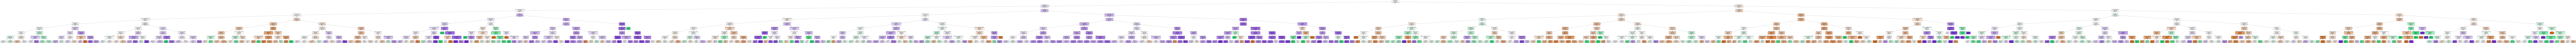

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(x_train.columns),class_names=['1','2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism.png')
Image(graph.create_png())

> Previewing the decision tree . income verified is the highest

> Well that was the first iteration then something even better came up

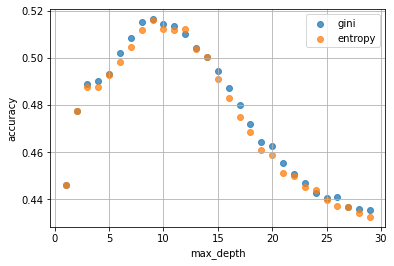

In [ ]:
acc_criterion()

> First i checked the distribution of accuracy against the max depth with different criterions( gini and entropy) in the decision tree

In [ ]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=11)
# Train it on our training set.
tree = tree.fit(x_train_over, y_train_over)
y_predbb = tree.predict(x_test)


In [ ]:
# checking the metrics
print('decision tree classifier')
print(metrics.accuracy_score(y_predbb,y_test))

decision tree classifier
0.4690149548881473


In [ ]:
print(metrics.confusion_matrix(y_test, y_predbb))

[[4947 1945 1443]
 [6301 5518 5605]
 [2885 3302 8509]]


In [ ]:
print(metrics.classification_report(y_predbb, y_test))

              precision    recall  f1-score   support

           1       0.59      0.35      0.44     14133
           2       0.32      0.51      0.39     10765
           3       0.58      0.55      0.56     15557

    accuracy                           0.47     40455
   macro avg       0.50      0.47      0.46     40455
weighted avg       0.51      0.47      0.47     40455



###best params and undersampler

In [ ]:
tree = DecisionTreeClassifier(criterion='gini',min_samples_split=2,max_depth=9)
# Train it on our training set.
tree = tree.fit(x_train_under, y_train_under)
y_predb11 = tree.predict(x_test)


In [ ]:
# checking the metrics
print('decision tree classifier')
print(metrics.accuracy_score(y_predb11,y_test))

decision tree classifier
0.464194784328266


In [ ]:
print(metrics.confusion_matrix(y_test, y_predb11))

[[4660 1912 1710]
 [5867 5164 6387]
 [2522 3278 8955]]


In [ ]:
print(metrics.classification_report(y_predb11, y_test))

              precision    recall  f1-score   support

           1       0.56      0.36      0.44     13049
           2       0.30      0.50      0.37     10354
           3       0.61      0.53      0.56     17052

    accuracy                           0.46     40455
   macro avg       0.49      0.46      0.46     40455
weighted avg       0.51      0.46      0.47     40455



In [ ]:
tree = DecisionTreeClassifier(criterion='gini',min_samples_split=2,max_depth=11)
# Train it on our training set.
tree = tree.fit(x_train_under, y_train_under)
y_predb2 = tree.predict(x_test)

In [ ]:
# checking the metrics
print('decision tree classifier')
print(metrics.accuracy_score(y_predb2,y_test))

decision tree classifier
0.46090718081819304


In [ ]:
print(metrics.confusion_matrix(y_test, y_predb2))

[[4689 2054 1539]
 [6108 5503 5807]
 [2659 3642 8454]]


In [ ]:
print(metrics.classification_report(y_predb2, y_test))

              precision    recall  f1-score   support

           1       0.57      0.35      0.43     13456
           2       0.32      0.49      0.38     11199
           3       0.57      0.54      0.55     15800

    accuracy                           0.46     40455
   macro avg       0.49      0.46      0.46     40455
weighted avg       0.50      0.46      0.47     40455



## <font color=”green”>Random Forest classifier model</font>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
xr=loan_model.drop(['Interest_Rate',],axis=1)
yr=loan_model['Interest_Rate']
xr_train,xr_test,yr_train,yr_test=train_test_split(xr,yr)

In [ ]:
scaler = MinMaxScaler()
xr_train = scaler.fit_transform(xr_train)
xr_test = scaler.transform(xr_test)

In [ ]:
rforest = RandomForestClassifier()
rforest = rforest.fit(xr_train, yr_train)
y_predr = rforest.predict(xr_test) 

In [ ]:
# checking the metrics
print('rforest classifier')
print(metrics.accuracy_score(y_predr,yr_test))

rforest classifier
0.5042392782103572


In [ ]:
print(metrics.confusion_matrix(yr_test, y_predr))

[[2425 4537 1402]
 [2242 9962 5245]
 [ 751 5879 8012]]


In [ ]:
print(metrics.classification_report(yr_test, y_predr))


              precision    recall  f1-score   support

           1       0.41      0.39      0.40      8364
           2       0.49      0.49      0.49     17449
           3       0.54      0.56      0.55     14642

    accuracy                           0.49     40455
   macro avg       0.48      0.48      0.48     40455
weighted avg       0.49      0.49      0.49     40455



> The random forest did not have the same issue as the decision tree and was able to overcome the class imbalance.so far it has performed better than the default decision tree.

IT performed poorly in the prediction of interest rate 1 since the f1 score is low compared to the others

there was also poor performance in the interest rate 1 where there was a realy low recal since it misclassified most of interest rate 1, however for thos it classified as interest rate 1 most of them were correctly classified.

However since it combines multiple trees it becomes, slow and worse for high dimensional data.


> I decided to upsample to see if it would improve the models performance

### Using oversampler

In [ ]:
# define oversampling strategy
oversampler = RandomOverSampler()

# fit and apply the transform
xr_train_over, yr_train_over = oversampler.fit_resample(xr_train, yr_train)

# summarize class distribution
print("After oversampling: ", np.bincount(yr_train_over))

After oversampling:  [    0 52229 52229 52229]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
rforest = RandomForestClassifier()
rforest = rforest.fit(xr_train_over, yr_train_over)
y_predr2 = rforest.predict(xr_test) 

In [ ]:
# checking the metrics
print('rforest classifier')
print(metrics.accuracy_score(y_predr2,yr_test))

rforest classifier
0.4909405512297615


In [ ]:
print(metrics.confusion_matrix(yr_test, y_predr2))

[[3203 3732 1429]
 [3387 8481 5581]
 [1318 5147 8177]]


In [ ]:
print(metrics.classification_report(yr_test, y_predr2))

              precision    recall  f1-score   support

           1       0.41      0.38      0.39      8364
           2       0.49      0.49      0.49     17449
           3       0.54      0.56      0.55     14642

    accuracy                           0.49     40455
   macro avg       0.48      0.48      0.48     40455
weighted avg       0.49      0.49      0.49     40455



In [ ]:
rforest = RandomForestClassifier()
rforest = rforest.fit(x_train_under, y_train_under)
y_predr3 = rforest.predict(x_test) 

In [ ]:
# checking the metrics
print('rforest classifier')
print(metrics.accuracy_score(y_predr3,y_test))

rforest classifier
0.4664194784328266


In [ ]:
print(metrics.confusion_matrix(y_test, y_predr3))

[[4720 2149 1413]
 [6029 5676 5713]
 [2530 3752 8473]]


In [ ]:
print(metrics.classification_report(y_test, y_predr3))

              precision    recall  f1-score   support

           1       0.36      0.57      0.44      8282
           2       0.49      0.33      0.39     17418
           3       0.54      0.57      0.56     14755

    accuracy                           0.47     40455
   macro avg       0.46      0.49      0.46     40455
weighted avg       0.48      0.47      0.46     40455



> The performance is similar in accuracy however the difference is visible where there was a improvement in the fi score of interest rate 1 from 0.35 to 0.39 although the f1 score of interest rate 2 droped.

Since there isnt much improvement and since random forest is handling the class imbalance really well we wont be resampling the data.

>Finding the best parameters (criterion, maximum depth and minimum samples split)for the decision tree 

* maximum depth: Is a measure of how deep the decision tree goes, having a reaaly deep tree could lead to overfitting while a shallow tree could lead to underfitting hence its a good idea to get a balance in the tree.
* n_estimators: Is how many trees will be used foor estimating the output of the random forest, Too high a value may not make the tree worce but will increase the amount of time the model runs for since it has to hinge on multiple trees.

###using oversampler and best params

In [ ]:
# Avoid running this if you dont need to 8+ hours so yeah try no to
max=np.arange(1,10)
est=np.arange(100,900,100)
grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators':est,'max_depth':max},cv=5,verbose=1)
grid.fit(x,y)
print('The best parameters ',grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 209.0min finished


The best parameters  {'max_depth': 9, 'n_estimators': 300}


In [ ]:
rforest = RandomForestClassifier(max_depth=9,n_estimators=300)
rforest = rforest.fit(xr_train_over, yr_train_over)
y_predr3 = rforest.predict(xr_test) 

In [ ]:
# checking the metrics
print('rforest classifier')
print(metrics.accuracy_score(y_predr3,yr_test))

rforest classifier
0.4814238042269188


In [ ]:
print(metrics.confusion_matrix(yr_test, y_predr3))

[[5154 1521 1689]
 [6148 4773 6528]
 [2499 2594 9549]]


In [ ]:
print(metrics.classification_report(yr_test, y_predr3))

              precision    recall  f1-score   support

           1       0.37      0.62      0.47      8364
           2       0.54      0.27      0.36     17449
           3       0.54      0.65      0.59     14642

    accuracy                           0.48     40455
   macro avg       0.48      0.51      0.47     40455
weighted avg       0.50      0.48      0.47     40455



> The model ended up outperforming the other models, it classification of interest rate 1 improved however the recal and fi score droped, it was really accurate at predicting interest rate 1, the other f1 scores also improved by a large margin

* The tuned model ended up being the best performing random forest classifier

> Similar case with the random forest, i checked the distribution of the accuracy and depth across the two criteria

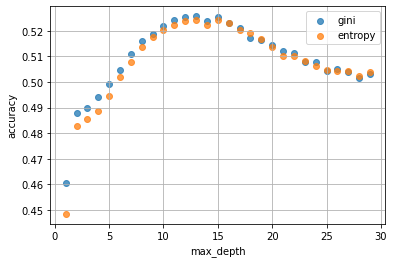

In [ ]:
acc_criterion('rf')

In [ ]:
rforest = RandomForestClassifier(max_depth= 13 ,n_estimators=300)
rforest = rforest.fit(xr_train_over, yr_train_over)
y_pred5 = rforest.predict(xr_test) 



In [ ]:
# checking the metrics
print('rforest classifier')
print(metrics.accuracy_score(y_pred5,yr_test))

rforest classifier
0.49220121122234584


In [ ]:
print(metrics.confusion_matrix(yr_test, y_pred5))

[[4830 1992 1542]
 [5559 5705 6185]
 [2141 3124 9377]]


In [ ]:
metrics.f1_score(y_pred5, yr_test,average='weighted')
print(metrics.classification_report(yr_test, y_pred5))

              precision    recall  f1-score   support

           1       0.39      0.58      0.46      8364
           2       0.53      0.33      0.40     17449
           3       0.55      0.64      0.59     14642

    accuracy                           0.49     40455
   macro avg       0.49      0.51      0.49     40455
weighted avg       0.51      0.49      0.48     40455



> By using the parameter(n_estimators) we got in the previous grid search we created a random forest classifier with the new max depth, and it performed better than the previous one (in terms of the f1 scores) but the accuracy remained unchanged

* Next we calculated the weighted f1 score of the entire classification. It was at 55.22 % fairly high

###best params and undersampler

In [ ]:
rforest = RandomForestClassifier(max_depth= 13 ,n_estimators=300)
rforest = rforest.fit(x_train_under, y_train_under)
y_pred7 = rforest.predict(x_test) 

In [ ]:
# checking the metrics
print('rforest classifier')
print(metrics.accuracy_score(y_pred7,y_test))

rforest classifier
0.48661475713756025


In [ ]:
print(metrics.confusion_matrix(y_test, y_pred7))

[[4955 1833 1494]
 [5915 5338 6165]
 [2287 3075 9393]]


In [ ]:
metrics.f1_score(y_pred7, y_test,average='weighted')
print(metrics.classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           1       0.38      0.60      0.46      8282
           2       0.52      0.31      0.39     17418
           3       0.55      0.64      0.59     14755

    accuracy                           0.49     40455
   macro avg       0.48      0.51      0.48     40455
weighted avg       0.50      0.49      0.48     40455



## <font color=”green”>Light Gradient Boost model</font>

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
xl=loan_model.drop(['Interest_Rate'],axis=1)
yl=loan_model['Interest_Rate']
xl_train,xl_test,yl_train,yl_test=train_test_split(xl,yl)

In [ ]:
scaler = MinMaxScaler()
xl_train = scaler.fit_transform(xl_train)
xl_test = scaler.transform(xl_test)

In [ ]:
lgbm_boost =LGBMClassifier()
lgbm_boost .fit(xl_train, yl_train)
lgbm_boost_y_predl =lgbm_boost.predict(xl_test)

In [ ]:
# checking the metrics
print('lgbm Boosting')
print(metrics.accuracy_score(lgbm_boost_y_predl,yl_test))

lgbm Boosting
0.5372636262513905


In [ ]:
print(metrics.confusion_matrix(lgbm_boost_y_predl, yl_test))

[[ 2115  1430   358]
 [ 5124 11110  5846]
 [ 1102  4860  8510]]


In [ ]:
print(metrics.classification_report(lgbm_boost_y_predl,yl_test))

              precision    recall  f1-score   support

           1       0.25      0.54      0.35      3903
           2       0.64      0.50      0.56     22080
           3       0.58      0.59      0.58     14472

    accuracy                           0.54     40455
   macro avg       0.49      0.54      0.50     40455
weighted avg       0.58      0.54      0.55     40455



### using oversampler

In [ ]:
# define oversampling strategy
oversample4 = RandomOverSampler()

# fit and apply the transform
xl_train_over, yl_train_over = oversample4.fit_resample(xl_train, yl_train)

# summarize class distribution
print("After oversampling: ", np.bincount(yl_train_over))

After oversampling:  [    0 52278 52278 52278]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lgbm_boost =LGBMClassifier()
lgbm_boost .fit(xl_train_over, yl_train_over)
lgbm_boost_y_pred2 =lgbm_boost.predict(xl_test)

In [ ]:
# checking the metrics
print('lgbm Boosting')
print(metrics.accuracy_score(lgbm_boost_y_pred2,yl_test))

lgbm Boosting
0.4990977629464837


In [ ]:
print(metrics.confusion_matrix(lgbm_boost_y_pred2, yl_test))

[[5174 5928 2255]
 [1816 5518 2960]
 [1351 5954 9499]]


In [ ]:
print(metrics.classification_report(lgbm_boost_y_pred2,yl_test))

              precision    recall  f1-score   support

           1       0.62      0.39      0.48     13357
           2       0.32      0.54      0.40     10294
           3       0.65      0.57      0.60     16804

    accuracy                           0.50     40455
   macro avg       0.53      0.50      0.49     40455
weighted avg       0.55      0.50      0.51     40455



### Using best params and oversampling

In [ ]:
#the parameters mostly checked are:
max=np.arange(1,10) 
learning_rate = [1,0.3,0.1,0.03,0.01,0.003,0.001]
est=np.arange(100,900,100)
grid = GridSearchCV(estimator= LGBMClassifier(),param_grid={'n_estimators':est,'max_depth':max,'learning_rate':learning_rate},cv=5,verbose=1)
grid.fit(x,y)
print('The best parameters ',grid.best_params_)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


.... It exceeded the time limit for google colab, so i decided to split it into multiple parts.

> Tuning the max depth of the light gbm model
* maximum depth: Is a measure of how deep the decision tree goes, having a reaaly deep tree could lead to overfitting while a shallow tree could lead to underfitting hence its a good idea to get a balance in the tree.

In [ ]:
max=np.arange(1,10) 
# learning_rate = [1,0.3,0.1,0.03,0.01,0.003,0.001]
# est=np.arange(100,900,100)
grid = GridSearchCV(estimator= LGBMClassifier(),param_grid={'max_depth':max},cv=5,verbose=1)
grid.fit(x,y)
print('The best parameters ',grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.9min finished


The best parameters  {'max_depth': 8}


> Tuning the learning rate of the light gbm model
* the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function

In [ ]:
# max=np.arange(1,10) 
learning_rate = [1,0.3,0.1,0.03,0.01,0.003,0.001]
# est=np.arange(100,900,100)
grid = GridSearchCV(estimator= LGBMClassifier(max_depth=8),param_grid={'learning_rate':learning_rate},cv=5,verbose=1)
grid.fit(x,y)
print('The best parameters ',grid.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  2.6min finished


The best parameters  {'learning_rate': 0.3}


> Tuning the number of estimators of the light gbm model
* n_estimators: Is how many trees will be used foor estimating the output of the random forest, Too high a value may not make the tree worce but will increase the amount of time the model runs for since it has to hinge on multiple trees.

In [ ]:
est=np.arange(100,900,100)

grid = GridSearchCV(estimator= LGBMClassifier(max_depth=8,learning_rate=0.3),param_grid={'n_estimators':est},cv=5,verbose=1)
grid.fit(x,y)
print('The best parameters ',grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  8.9min finished


The best parameters  {'n_estimators': 100}


> Tuning the number of leaves of the light gbm model

In [ ]:
num_leaves=np.arange(21,41)
grid = GridSearchCV(estimator= LGBMClassifier(max_depth=8,learning_rate=0.3,n_estimators=100),param_grid={'num_leaves':num_leaves},cv=5,verbose=1)
grid.fit(x,y)
print('The best parameters ',grid.best_params_)

The best parameters  {'num_leaves': 27}


> Tuning the boosting type

In [ ]:
# num_leaves=np.arange(21,41)# default 31
boosting_type= ['gbdt','rf', 'dart', 'goss']
grid = GridSearchCV(estimator= LGBMClassifier(max_depth=8,learning_rate=0.3,n_estimators=100,num_leaves=27),param_grid={'boosting_type':boosting_type},cv=5,verbose=1)
grid.fit(x,y)
print('The best parameters ',grid.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 28 .



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.9min finished


The best parameters  {'boosting_type': 'gbdt'}


> The best features were:
* maximum depth     at 8
* learning rate     at 0.3
* no of estimators  at 100 estimators
* no of leaves      at 27 leaves
* boosting type     on gradient boosted decision tree

In [ ]:
lgbm_boost =LGBMClassifier(max_depth=8,learning_rate=0.3,n_estimators=100,num_leaves=27,boosting_type='gbdt')
lgbm_boost .fit(xl_train_over, yl_train_over)
lgbm_boost_y_pred3 =lgbm_boost.predict(xl_test)

In [ ]:
# checking the metrics
print('lgbm best Boosting')
print(metrics.accuracy_score(lgbm_boost_y_pred3,yl_test))

lgbm best Boosting
0.5012235817575084


In [ ]:
print(metrics.confusion_matrix(lgbm_boost_y_pred3, yl_test))

[[5087 5807 2170]
 [1975 5839 3193]
 [1279 5754 9351]]


In [ ]:
print(metrics.classification_report(lgbm_boost_y_pred3,yl_test))

              precision    recall  f1-score   support

           1       0.61      0.39      0.48     13064
           2       0.34      0.53      0.41     11007
           3       0.64      0.57      0.60     16384

    accuracy                           0.50     40455
   macro avg       0.53      0.50      0.50     40455
weighted avg       0.55      0.50      0.51     40455



> Once the parameters for the model were tuned, the model performances improved, the precision and fi scores of interest rate 1 were what led to the huge improvement in the performance

###using undersampler

In [ ]:
# define undersampling strategy
undersample2 = RandomUnderSampler()

# fit and apply the transform
xl_train_under, yl_train_under = undersample2.fit_resample(xl_train, yl_train)

# summarize class distribution
print("After undersampling: ", np.bincount(yl_train_under))

After undersampling:  [    0 25001 25001 25001]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lgbm_boost =LGBMClassifier()
lgbm_boost .fit(xl_train_under, yl_train_under)
lgbm_boost_y_pred23 =lgbm_boost.predict(xl_test)

In [ ]:
# checking the metrics
print('lgbm Boosting')
print(metrics.accuracy_score(lgbm_boost_y_pred23,yl_test))

lgbm Boosting
0.5011741441107403


In [ ]:
print(metrics.confusion_matrix(lgbm_boost_y_pred23, yl_test))

[[5194 5823 2281]
 [1778 5563 3067]
 [1344 5887 9518]]


In [ ]:
print(metrics.classification_report(lgbm_boost_y_pred23,yl_test))

              precision    recall  f1-score   support

           1       0.62      0.39      0.48     13298
           2       0.32      0.53      0.40     10408
           3       0.64      0.57      0.60     16749

    accuracy                           0.50     40455
   macro avg       0.53      0.50      0.49     40455
weighted avg       0.55      0.50      0.51     40455



###best params and undersampling

In [ ]:
lgbm_boost =LGBMClassifier(max_depth=8,learning_rate=0.3,n_estimators=100,num_leaves=27,boosting_type='gbdt')
lgbm_boost .fit(xl_train_under, yl_train_under)
lgbm_boost_y_pred34 =lgbm_boost.predict(xl_test)

In [ ]:
# checking the metrics
print('lgbm Boosting')
print(metrics.accuracy_score(lgbm_boost_y_pred34,yl_test))

lgbm Boosting
0.5015696452848845


In [ ]:
print(metrics.confusion_matrix(lgbm_boost_y_pred34, yl_test))

[[5134 5796 2285]
 [1877 5767 3191]
 [1305 5710 9390]]


In [ ]:
print(metrics.classification_report(lgbm_boost_y_pred34,yl_test))

              precision    recall  f1-score   support

           1       0.62      0.39      0.48     13215
           2       0.33      0.53      0.41     10835
           3       0.63      0.57      0.60     16405

    accuracy                           0.50     40455
   macro avg       0.53      0.50      0.50     40455
weighted avg       0.55      0.50      0.51     40455



## <font color=”green”>Gradient Boost classifier model</font>

Boosting grants power to machine learning models to improve their accuracy of prediction.The term ‘Boosting’ refers to a family of algorithms which converts weak learner to strong learners.

In gradient boosting, it trains many model sequentially. Each new model gradually minimizes the loss function (y = ax + b + e, e needs special attention as it is an error term) of the whole system using Gradient Descent method.

It is a generalization of boosting to arbitrary differentiable loss functions. It can be used for both regression and classification problems.

In [ ]:
#import the necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

In [ ]:
#For Classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x=loan_model.drop(['Interest_Rate',],axis=1)
y=loan_model['Interest_Rate']
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
#  Creating default models

gbm_classifier = GradientBoostingClassifier()

# training our models

gbm_classifier.fit(x_train, y_train)

# making predictions using the models

gbm_y_pred = gbm_classifier.predict(x_test)


In [ ]:
# checking the metrics
print('Gradient Boosting')
print(metrics.accuracy_score(gbm_y_pred, y_test))

Gradient Boosting
0.5281670992460759


In [ ]:
print(metrics.confusion_matrix(gbm_y_pred, y_test))

[[ 1717  1134   267]
 [ 5420 11458  6175]
 [ 1187  4905  8192]]


Our accuracy of our model is low! Diving deeper into the confusion matrix, we observe that our model is predicted with 18512 out of 34740 observations, giving us an accuracy of 53.18%. There were 16228 cases that our model got wrong. These are many cases were divided between False negatives and false positives as 9 and 14 respectively.This means there is an imbalance.We need to hyperparameter tune.


In [ ]:
print(metrics.classification_report(gbm_y_pred, y_test))

              precision    recall  f1-score   support

           1       0.21      0.55      0.30      3118
           2       0.65      0.50      0.57     23053
           3       0.56      0.57      0.57     14284

    accuracy                           0.53     40455
   macro avg       0.47      0.54      0.48     40455
weighted avg       0.59      0.53      0.55     40455



> * Precision can be thought of as a measure of a classifiers exactness. A low precision can also indicate a large number of False Positives.And we can see the precision of interest rate of category 2 iS HIGHEST at 66% followed by category 3 then one .Interest category 2 has more true positives compared to all its true values .

> * Recall can be thought of as a measure of a classifiers completeness. A low recall indicates many False Negatives.In this column we realise that most true positives are in th interest rate category 3 ,where it becomes a case of almost equal precision and recall but category has high precision and low recall.

> * Put another way, the F1 score conveys the balance between the precision and the recall.

> * In the support column we can the number of columns that support each interest rate category and interest category two has 19863 columns out of totall 34740

###<font color=”green”>Gradient Boosting Hyparameter Tuning</font>

There is a lot of parameters here, so I will only cover the most important:

* Criterion: The loss function used to find the optimal feature and threshold to split the data
* learning_rate: this parameter scales the contribution of each tree
max_depth: the maximum depth of each tree
* n_estimators: the number of trees to construct
* init: the initial estimator. By default, it is the log(odds) converted to a probability(like we discussed before)

In [ ]:
x=loan_model.drop(['Interest_Rate',],axis=1)
y=loan_model['Interest_Rate']
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
#  Creating default models

gbm_classifier1 = GradientBoostingClassifier(learning_rate=0.1,min_samples_leaf=50,min_samples_split=500,max_depth=8,max_features='sqrt',subsample=0.7,random_state=10)

# training our models

gbm_classifier1.fit(x_train, y_train)

# making predictions using the models

gbm_y_pred2 = gbm_classifier1.predict(x_test)


In [ ]:
tuning.fit(x_train,y_train)

In [ ]:
# checking the metrics
print('Gradient Boosting')
print(metrics.accuracy_score(gbm_y_pred2, y_test))

Gradient Boosting
0.5310097639352367


In [ ]:
print(metrics.confusion_matrix(gbm_y_pred2, y_test))

[[ 2106  1520   366]
 [ 5083 11039  5931]
 [ 1135  4938  8337]]


In [ ]:
print(metrics.classification_report(gbm_y_pred2, y_test))

              precision    recall  f1-score   support

           1       0.25      0.53      0.34      3992
           2       0.63      0.50      0.56     22053
           3       0.57      0.58      0.57     14410

    accuracy                           0.53     40455
   macro avg       0.48      0.54      0.49     40455
weighted avg       0.57      0.53      0.54     40455



using the oversampled train and tests

In [ ]:
#  Creating default models

gbm_classifier1 = GradientBoostingClassifier(learning_rate=0.1,min_samples_leaf=50,min_samples_split=500,max_depth=8,max_features='sqrt',subsample=0.7,random_state=10)

# training our models

gbm_classifier1.fit(x_train_overt, y_train_overt)

# making predictions using the models

gbm_y_pred3 = gbm_classifier1.predict(x_test_over)

In [ ]:
 #checking the metrics
print('Gradient oversampling Boosting')
print(metrics.accuracy_score(gbm_y_pred3, y_test_over))

Gradient oversampling Boosting
0.5002851602600662


In [ ]:
print(metrics.confusion_matrix(gbm_y_pred3, y_test_over))

[[ 5712  2152   670]
 [ 9436 10411  6671]
 [ 2386  4971 10193]]


In [ ]:
print(metrics.classification_report(gbm_y_pred3, y_test_over))

              precision    recall  f1-score   support

           1       0.33      0.67      0.44      8534
           2       0.59      0.39      0.47     26518
           3       0.58      0.58      0.58     17550

    accuracy                           0.50     52602
   macro avg       0.50      0.55      0.50     52602
weighted avg       0.55      0.50      0.50     52602



###<font color=”green”>Gradient Boost Model Grid Search </font>

**Tuning n_estimators and Learning rate**:

> n_estimators captures the number of trees that we add to the model. A high number of trees can be computationally expensive. Generally, with a change in learning rate,n_estimators should also be adjusted (10-fold decrease in learning_rate should go in line with a approx. 10-fold increase in n_estimators.

In [ ]:
from sklearn.model_selection import GridSearchCV

learning_rate = [0.1,0.03,0.01,0.003,0.001,0.05]

grid = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid={'learning_rate':learning_rate},cv=5,verbose=3)
grid.fit(x,y)
print('The best parameters ',grid.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] learning_rate=0.1 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... learning_rate=0.1, score=0.533, total= 1.0min
[CV] learning_rate=0.1 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV] ................... learning_rate=0.1, score=0.530, total= 1.0min
[CV] learning_rate=0.1 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.1min remaining:    0.0s


[CV] ................... learning_rate=0.1, score=0.534, total= 1.0min
[CV] learning_rate=0.1 ...............................................
[CV] ................... learning_rate=0.1, score=0.535, total= 1.0min
[CV] learning_rate=0.1 ...............................................
[CV] ................... learning_rate=0.1, score=0.535, total= 1.0min
[CV] learning_rate=0.03 ..............................................
[CV] .................. learning_rate=0.03, score=0.519, total= 1.0min
[CV] learning_rate=0.03 ..............................................
[CV] .................. learning_rate=0.03, score=0.517, total= 1.0min
[CV] learning_rate=0.03 ..............................................
[CV] .................. learning_rate=0.03, score=0.519, total= 1.0min
[CV] learning_rate=0.03 ..............................................
[CV] .................. learning_rate=0.03, score=0.520, total=  60.0s
[CV] learning_rate=0.03 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 30.3min finished


The best parameters  {'learning_rate': 0.1}


**max_depth**:

>max_depth bounds the maximum depth of the tree. We can use the obtained results to tune the max_depth parameter. There is one interesting comment on depth in the scikit-learn documentation especially relevant for large datasets: "We found that max_leaf_nodes=k gives comparable results to max_depth=k-1 but is significantly faster to train at the expense of a slightly higher training error."

In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth = [2,3,4,5,6,7,9]

grid = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid={'max_depth':max_depth},cv=5,verbose=3)
grid.fit(x,y)
print('The best parameters ',grid.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... max_depth=2, score=0.527, total=  49.1s
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.1s remaining:    0.0s


[CV] ......................... max_depth=2, score=0.524, total=  48.0s
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


[CV] ......................... max_depth=2, score=0.529, total=  45.6s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.530, total=  45.4s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.530, total=  45.3s
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.533, total= 1.1min
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.530, total= 1.1min
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.534, total= 1.1min
[CV] max_depth=3 .....................................................
[CV] ......................... max_depth=3, score=0.535, total= 1.0min
[CV] max_depth=3 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 58.4min finished


The best parameters  {'max_depth': 7}


###GBM model with best paramas and oversampling

In [ ]:
#  best param gbm models

gbm_classifier2 = GradientBoostingClassifier(learning_rate=0.1,max_depth=7,max_features='sqrt',subsample=0.8,random_state=10,min_samples_leaf=50,min_samples_split=500)

# training our models

gbm_classifier2.fit(x_train_over, y_train_over)

# making predictions using the models

gbm_y_pred3 = gbm_classifier2.predict(x_test)


In [ ]:
# checking the metrics
print('Gradient Boosting')
print(metrics.accuracy_score(gbm_y_pred3, y_test))

Gradient Boosting
0.503306142627611


In [ ]:
print(metrics.confusion_matrix(gbm_y_pred3, y_test))

[[4154 4699 1732]
 [1472 4646 2572]
 [1121 4479 7489]]


In [ ]:
print(metrics.classification_report(gbm_y_pred3, y_test))

              precision    recall  f1-score   support

           1       0.62      0.39      0.48     10585
           2       0.34      0.53      0.41      8690
           3       0.64      0.57      0.60     13089

    accuracy                           0.50     32364
   macro avg       0.53      0.50      0.50     32364
weighted avg       0.55      0.50      0.51     32364



###GBM model with best params and undersampling

In [ ]:
#  best param gbm models

gbm_classifier3 = GradientBoostingClassifier(learning_rate=0.1,max_depth=7,max_features='sqrt',subsample=0.8,random_state=10,min_samples_leaf=50,min_samples_split=500)

# training our models

gbm_classifier3.fit(x_train_under, y_train_under)

# making predictions using the models

gbm_y_pred34 = gbm_classifier3.predict(x_test)

In [ ]:
# checking the metrics
print('Gradient Boosting')
print(metrics.accuracy_score(gbm_y_pred34, y_test))

Gradient Boosting
0.4934371523915462


In [ ]:
print(metrics.confusion_matrix(gbm_y_pred34, y_test))

[[4961 5851 2253]
 [1898 5626 3127]
 [1423 5941 9375]]


In [ ]:
print(metrics.classification_report(gbm_y_pred34, y_test))

              precision    recall  f1-score   support

           1       0.60      0.38      0.46     13065
           2       0.32      0.53      0.40     10651
           3       0.64      0.56      0.60     16739

    accuracy                           0.49     40455
   macro avg       0.52      0.49      0.49     40455
weighted avg       0.54      0.49      0.50     40455



##<font color=”green”>Cat Boosting Model </font>

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today. To top it up, it provides best-in-class accuracy.

It is especially powerful in two ways:

It yields state-of-the-art results without extensive data training typically required by other machine learning methods, and
Provides powerful out-of-the-box support for the more descriptive data formats that accompany many business problems.
“CatBoost” name comes from two words “Category” and “Boosting”.

As discussed, the library works well with multiple Categories of data, such as audio, text, image including historical data.

“Boost” comes from gradient boosting machine learning algorithm as this library is based on gradient boosting library. Gradient boosting is a powerful machine learning algorithm that is widely applied to multiple types of business challenges like fraud detection, recommendation items, forecasting and it performs well also. It can also return very good result with relatively less data, unlike DL models that need to learn from a massive amount of data


I*n addition to this, CatBoost does not require conversion of data set to any specific format like XGBoost and LightGBM.*
*italicized text*
 

In [ ]:
pip install catboost

     |████████████████████████████████| 65.8MB 87kB/s 


In [ ]:
import copy
%matplotlib inline

In [ ]:
cat_loans.dtypes

Income_Verified     category
Purpose_Of_Loan     category
deliquency_level    category
Interest_Rate       category
dtype: object

In [ ]:
x2=cat_loans
y2=loan_model['Interest_Rate']
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2)

The first thing we want to do is install the library which is most easily done via pip.

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat_boost = CatBoostClassifier()
cat_boost .fit(x2_train, y2_train,cat_features=cat_loans,eval_set=(x2_test, y2_test))
catboost_y_pred = cat_boost .predict(x2_test)

Learning rate set to 0.118853
0:	learn: 0.8755826	test: 0.8755826	best: 0.8755826 (0)	total: 271ms	remaining: 4m 31s
1:	learn: 0.7192009	test: 0.7192009	best: 0.7192009 (1)	total: 481ms	remaining: 3m 59s
2:	learn: 0.6015282	test: 0.6015282	best: 0.6015282 (2)	total: 634ms	remaining: 3m 30s
3:	learn: 0.5092780	test: 0.5092780	best: 0.5092780 (3)	total: 791ms	remaining: 3m 16s
4:	learn: 0.4349850	test: 0.4349850	best: 0.4349850 (4)	total: 940ms	remaining: 3m 7s
5:	learn: 0.3740054	test: 0.3740054	best: 0.3740054 (5)	total: 1.14s	remaining: 3m 8s
6:	learn: 0.3232431	test: 0.3232431	best: 0.3232431 (6)	total: 1.29s	remaining: 3m 3s
7:	learn: 0.2805267	test: 0.2805267	best: 0.2805267 (7)	total: 1.44s	remaining: 2m 57s
8:	learn: 0.2442735	test: 0.2442735	best: 0.2442735 (8)	total: 1.6s	remaining: 2m 56s
9:	learn: 0.2132945	test: 0.2132945	best: 0.2132945 (9)	total: 1.74s	remaining: 2m 52s
10:	learn: 0.1866740	test: 0.1866740	best: 0.1866740 (10)	total: 1.89s	remaining: 2m 50s
11:	learn: 0.16

In [ ]:
# checking the metrics
print('Cat Boosting')
print(metrics.accuracy_score(catboost_y_pred, y2_test))

Cat Boosting
1.0


In [ ]:
print(metrics.confusion_matrix(catboost_y_pred, y2_test))

[[ 8338     0     0]
 [    0 17461     0]
 [    0     0 14656]]


In [ ]:
print(metrics.classification_report(catboost_y_pred, y2_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      8338
           2       1.00      1.00      1.00     17461
           3       1.00      1.00      1.00     14656

    accuracy                           1.00     40455
   macro avg       1.00      1.00      1.00     40455
weighted avg       1.00      1.00      1.00     40455



###<font color=”green”>Cat Boosting Hyparameter Tuning</font>

Advantages of CatBoost Library **bold text**

Performance: CatBoost provides state of the art results and it is competitive with any leading machine learning algorithm on the performance front.

Handling Categorical features automatically: We can use CatBoost without any explicit pre-processing to convert categories into numbers. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features. You can read more about it here.

Robust: It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting also which leads to more generalized models. Although, CatBoost has multiple parameters to tune and it contains parameters like the number of trees, learning rate, regularization, tree depth, fold size, bagging temperature and others. You can read about all these parameters here.
Easy-to-use: You can use CatBoost from the command line, using an user-friendly API for both Python and R.

In [ ]:
# define oversampling strategy
oversample2 = RandomOverSampler()

# fit and apply the transform
x2_train_over, y2_train_over = oversample2.fit_resample(x2_train, y2_train)

# summarize class distribution
print("After oversampling: ", np.bincount(y2_train_over))

After oversampling:  [    0 52199 52199 52199]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
cat_boost2 = CatBoostClassifier()
cat_boost2.fit(x2_train_over, y2_train_over,cat_features=cat_loans,eval_set=(x2_test, y2_test))
catboost_y_pred2 = cat_boost2.predict(x2_test)

CatBoostError: ignored

In [ ]:
# checking the metrics
print('Cat Boosting')
print(metrics.accuracy_score(catboost_y_pred2, y_test))

Cat Boosting
0.5371905584340817


In [ ]:
print(metrics.confusion_matrix(catboost_y_pred2, y_test))

[[1811 1207  328]
 [4417 9573 5077]
 [ 974 4075 7278]]


In [ ]:
print(metrics.classification_report(catboost_y_pred2, y_test))

              precision    recall  f1-score   support

           1       0.25      0.54      0.34      3346
           2       0.64      0.50      0.56     19067
           3       0.57      0.59      0.58     12327

    accuracy                           0.54     34740
   macro avg       0.49      0.54      0.50     34740
weighted avg       0.58      0.54      0.55     34740



##<font color=”green”>XGBoost Model </font>


 

In [ ]:
num_loans.dtypes

Loan_Amount_Requested      int64
Debt_To_Income           float64
Annual_Income            float64
Inquiries_Last_6Mo         int64
Total_Accounts             int64
dtype: object

In [ ]:
x1=num_loans
y1=loan_model['Interest_Rate']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1)

The first thing we want to do is install the library which is most easily done via pip.

In [ ]:
!pip install xgboost

At the same time, we’ll also import our newly installed XGBoost library.

In [ ]:
import xgboost as xgbClassifier
from xgboost.sklearn import XGBClassifier

In [ ]:
scaler = MinMaxScaler()
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

In [ ]:
xbg_boost = XGBClassifier()
xbg_boost .fit(x1_train, y1_train)
xbg_boost_y1_pred = xbg_boost.predict(x1_test)

In [ ]:
# checking the metrics
print('XGB Boosting')
print(metrics.accuracy_score(xbg_boost_y1_pred , y1_test))

XGB Boosting
0.5020393029291805


In [ ]:
print(metrics.confusion_matrix(xbg_boost_y1_pred , y1_test))

[[  605   524   214]
 [ 6353 12288  7035]
 [ 1350  4669  7417]]


In [ ]:
print(metrics.classification_report(xbg_boost_y1_pred ,y1_test))

              precision    recall  f1-score   support

           1       0.07      0.45      0.13      1343
           2       0.70      0.48      0.57     25676
           3       0.51      0.55      0.53     13436

    accuracy                           0.50     40455
   macro avg       0.43      0.49      0.41     40455
weighted avg       0.62      0.50      0.54     40455



###<font color=”green”>XGBoost Model Hyperparameter Tuning</font>

It is common to have small values in the range of 0.1 to 0.3. The smaller weighting of these residuals will still help us train a powerful model, but won’t let that model run away into deep complexity where overfitting is more likely to happen.

* The simplest parameters are the max_depth (maximum depth of the decision trees being trained), objective (the loss function being used), and num_class (the number of classes in the dataset). The eta algorithm requires special attention.

* Due to the nature of an ensemble, i.e having several models put together to form what is essentially a very large complicated one, makes this technique prone to overfitting. The eta parameter gives us a chance to prevent this overfitting
The eta can be thought of more intuitively as a learning rate.

* It is common to have small values in the range of 0.1 to 0.3. The smaller weighting of these residuals will still help us train a powerful model, but won’t let that model run away into deep complexity where overfitting is more likely to happen.



### Using oversampler

In [ ]:
# define oversampling strategy
oversample3 = RandomOverSampler()

# fit and apply the transform
x1_train_over, y1_train_over = oversample3.fit_resample(x1_train, y1_train)

# summarize class distribution
print("After oversampling: ", np.bincount(y1_train_over))

After oversampling:  [    0 52197 52197 52197]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
xbg_boost = XGBClassifier()
xbg_boost .fit(x1_train_over, y1_train_over)
xbg_boost_y_pred4 = xbg_boost.predict(x1_test)

In [ ]:
# checking the metrics
print('XGB Boosting')
print(metrics.accuracy_score(xbg_boost_y_pred4, y1_test))

XGB Boosting
0.4511185267581263


In [ ]:
print(metrics.confusion_matrix(xbg_boost_y_pred4, y1_test))

[[4743 6611 3081]
 [1800 4760 2838]
 [1765 6110 8747]]


In [ ]:
print(metrics.classification_report(xbg_boost_y_pred4,y1_test))

              precision    recall  f1-score   support

           1       0.57      0.33      0.42     14435
           2       0.27      0.51      0.35      9398
           3       0.60      0.53      0.56     16622

    accuracy                           0.45     40455
   macro avg       0.48      0.45      0.44     40455
weighted avg       0.51      0.45      0.46     40455



### Using random parameters and oversampler

In [ ]:
xbg_boost = XGBClassifier(eta=0.1, 
    max_depth=9,  
    objective='multi:softprob',  
    num_class='3')
xbg_boost .fit(x1_train_over, y1_train_over)
xbg_boost_y1_pred3 = xbg_boost .predict(x1_test)

In [ ]:
# checking the metrics
print('XGB Boosting')
print(metrics.accuracy_score(xbg_boost_y1_pred3, y1_test))

XGB Boosting
0.4555679149672476


In [ ]:
print(metrics.confusion_matrix(xbg_boost_y1_pred3, y1_test))

[[4535 6329 2798]
 [2067 5299 3272]
 [1706 5853 8596]]


In [ ]:
print(metrics.classification_report(xbg_boost_y1_pred3,y1_test))

              precision    recall  f1-score   support

           1       0.55      0.33      0.41     13662
           2       0.30      0.50      0.38     10638
           3       0.59      0.53      0.56     16155

    accuracy                           0.46     40455
   macro avg       0.48      0.45      0.45     40455
weighted avg       0.50      0.46      0.46     40455



###<font color=”green”>XGBoost Model Hyperparameter Tuning Using Gridsearch</font>


* cool features that’ll help you get the most out of your models.(doing a grid search is essentially training an ensemble of decision trees many times over!)

> * The gamma parameter can also help with controlling overfitting. It specifies the minimum reduction in the loss required to make a further partition on a leaf node of the tree. I.e if creating a new node doesn’t reduce the loss by a certain amount, then we won’t create it at all.

> * The booster parameter allows you to set the type of model you will use when building the ensemble. The default is gbtree which builds an ensemble of decision trees. If your data isn’t too complicated, you can go with the faster and simpler gblinear option which builds an ensemble of linear models.

> * Setting the optimal hyperparameters of any ML model can be a challenge. So why not let Scikit Learn do it for you? We can combine Scikit Learn’s grid search with an XGBoost classifier quite easily:

### tuning eta rate

In [ ]:
from sklearn.model_selection import GridSearchCV

eta_rate = [0.1,0.03,0.01,0.003,0.001,0.05]

grid = GridSearchCV(estimator= XGBClassifier(),param_grid={'eta_rate':eta_rate},cv=5,verbose=3)
grid.fit(x,y)
print('The best parameters ',grid.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] eta_rate=0.1 ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................ eta_rate=0.1, score=0.501, total=  11.8s
[CV] eta_rate=0.1 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s remaining:    0.0s


[CV] ........................ eta_rate=0.1, score=0.497, total=  12.0s
[CV] eta_rate=0.1 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.8s remaining:    0.0s


[CV] ........................ eta_rate=0.1, score=0.503, total=  12.2s
[CV] eta_rate=0.1 ....................................................
[CV] ........................ eta_rate=0.1, score=0.502, total=  12.4s
[CV] eta_rate=0.1 ....................................................
[CV] ........................ eta_rate=0.1, score=0.500, total=  12.4s
[CV] eta_rate=0.03 ...................................................
[CV] ....................... eta_rate=0.03, score=0.501, total=  12.1s
[CV] eta_rate=0.03 ...................................................
[CV] ....................... eta_rate=0.03, score=0.497, total=  11.9s
[CV] eta_rate=0.03 ...................................................
[CV] ....................... eta_rate=0.03, score=0.503, total=  11.8s
[CV] eta_rate=0.03 ...................................................
[CV] ....................... eta_rate=0.03, score=0.502, total=  12.0s
[CV] eta_rate=0.03 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.0min finished


The best parameters  {'eta_rate': 0.1}


In [ ]:
max_depth =np.arange(1,30)
grid = GridSearchCV(estimator= XGBClassifier(eta_rate=0.1),param_grid={'max_depth':max_depth},cv=5,verbose=3)
grid.fit(x,y)
print('The best parameters ',grid.best_params_)


Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... max_depth=1, score=0.489, total=   5.9s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.488, total=   5.9s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.8s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.491, total=   5.9s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.493, total=   6.0s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.489, total=   5.8s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.498, total=   8.7s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.495, total=   8.7s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.499, total=   8.6s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.499, total=   8.7s
[CV] max_depth=2 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed: 179.9min finished


The best parameters  {'max_depth': 7}


In [ ]:
xbg_boost = XGBClassifier(eta=0.1, 
    max_depth=7,  
    objective='multi:softprob',  
    num_class='3')
xbg_boost .fit(x1_train_over, y1_train_over)
xbg_boost_y_pred5 = xbg_boost .predict(x1_test)

In [ ]:
# checking the metrics
print('XGB Boosting')
print(metrics.accuracy_score(xbg_boost_y_pred5, y1_test))

XGB Boosting
0.45727351378074405


In [ ]:
print(metrics.confusion_matrix(xbg_boost_y_pred5, y1_test))

[[4692 6511 2937]
 [1899 5041 2963]
 [1717 5929 8766]]


In [ ]:
print(metrics.classification_report(xbg_boost_y_pred5,y1_test))

              precision    recall  f1-score   support

           1       0.56      0.33      0.42     14140
           2       0.29      0.51      0.37      9903
           3       0.60      0.53      0.56     16412

    accuracy                           0.46     40455
   macro avg       0.48      0.46      0.45     40455
weighted avg       0.51      0.46      0.47     40455



###best params and undersamplimg

In [ ]:
# define oversampling strategy
oversample4 = RandomUnderSampler()

# fit and apply the transform
x1_train_under, y1_train_under = oversample4.fit_resample(x1_train, y1_train)

# summarize class distribution
print("After oversampling: ", np.bincount(y1_train_under))

After oversampling:  [    0 24990 24990 24990]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
xbg_boost = XGBClassifier(eta=0.1, 
    max_depth=7,  
    objective='multi:softprob',  
    num_class='3')
xbg_boost .fit(x1_train_under, y1_train_under)
xbg_boost_y_pred5 = xbg_boost .predict(x1_test)

In [ ]:
# checking the metrics
print('XGB Boosting')
print(metrics.accuracy_score(xbg_boost_y_pred5, y1_test))

XGB Boosting
0.44612532443455694


In [ ]:
print(metrics.confusion_matrix(xbg_boost_y_pred5, y1_test))

[[4815 6758 3120]
 [1846 4763 3029]
 [1666 5988 8470]]


In [ ]:
print(metrics.classification_report(xbg_boost_y_pred5,y1_test))

              precision    recall  f1-score   support

           1       0.58      0.33      0.42     14693
           2       0.27      0.49      0.35      9638
           3       0.58      0.53      0.55     16124

    accuracy                           0.45     40455
   macro avg       0.48      0.45      0.44     40455
weighted avg       0.51      0.45      0.46     40455

